## Abstract

<div style="text-align: justify;">
En el siguiente notebook se trabajará con un conjunto de datos provenientes de Monitoreo Acústico Pasivo (PAM) en una locación al sur de Chile.
El PAM consiste en el uso de unidades de grabación autonomas para el registro de datos de audio en terreno. Los datos usados en este proyecto fueron extraidos de grabaciones realizadas según un esquema de 1 minuto cada 5 minutos 24 horas al día durante 15 días. Esta unidad de muestreo se repitió en 21 sitios separados por almenos 1 km.
El conjunto de datos 'Índices' proviene del cálculo de índices acústicos, estos tienen como objetivo caracterizar la biodiversidad en el espacio y en el tiempo a través de la incidencia, abundancia y características de los sonidos.
El conjunto de datos 'Riquezas' proviene de datectores supervisados de cantos de aves, especificamente el conjunto contiene registro de cuantas especies distintas se detectaron en ese minuto de grabación.
Por último el conjunto de datos 'Biofonías' provine de las predicciones realizadas por una Red Neuronal Convolucional que buscaba identificar la precencia de cinco categorías de fuentes sonoras: biofonías (sonidos provenientes de entidaes vivas), geofonías (sonidos provenientes de entidades naturales no vivas), antropofonías (sonidos provenientes del quehacer humano), quiet (momentos de silencio) e Interferencias (electrónicas o mecánicas). Los umbrales de decisión fueron menores a 0.5 (basados en valores de precision y recall) para todas las cetegorías menos para las biofonías, lo que sigiere que solo la identificación de esta última clase es precisa. 
Con este conjunto de datos de busca evaluar la relación entre estas tres formas de extrae información de relavancia ecológica a partir de grabaciones de audio. Particulamente se busca comparar la distribución de estas métricas a lo largo del día (24 h), diaria (15 días) y espacial (los 21 sitios). Se espera que exista una variación diaria asociada al amanecer y atardecer común entre sitios, sin embargo, no se esperan ver patrones de variación comunes durante los 15 días 
</div>


#### Archivos comprimidos

Los archivos csv se encuentran el la carpeta **datasets.zip**.
Por favor, descargar y descomprimir el archivo antes de ejecutar el notebook.

**Repositorio** = 'https://github.com/camilobehrens/Entrega1_datascience'


In [22]:
import pandas as pd

# Ubicación de los archivos CSV
ruta1 = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Entrega1_datascience\datesets\cleaned_indexes.csv'

ruta2 = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Entrega1_datascience\datesets\cleaned_richness.csv'

ruta3 = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Entrega1_datascience\datesets\cleaned_soundcape.csv'

# Carga de los csv en DataFrames
indices = pd.read_csv(ruta1)
riquezas = pd.read_csv(ruta2)
biofonias = pd.read_csv(ruta3)

# Visualización DataFrames
print(indices.head())
print(riquezas.head())
print(biofonias.head())

         datetime        id     fecha     hora          site  \
0  9/28/2023 0:00  SMM09353  20230928  0:00:00  P15_SMM09353   
1  9/28/2023 0:00  SMM09520  20230928  0:00:00  P36_SMM09520   
2  9/28/2023 0:00  SMM09557  20230928  0:00:00  P04_SMM09557   
3  9/28/2023 0:00  SMM09245  20230928  0:00:00  P40_SMM09245   
4  9/28/2023 0:00  SMM09565  20230928  0:00:00  P34_SMM09565   

                                                file         MEANt  \
0  /home/msg/Escritorio/Camilo_Behrens/20230928/P...  1.890000e-19   
1  /home/msg/Escritorio/Camilo_Behrens/20230928/P...  5.140000e-20   
2  /home/msg/Escritorio/Camilo_Behrens/20230928/P...  3.980000e-20   
3  /home/msg/Escritorio/Camilo_Behrens/20230928/P... -3.760000e-20   
4  /home/msg/Escritorio/Camilo_Behrens/20230928/P... -4.250000e-19   

           VARt        Ht     MEANf          VARf        Hf     SKEWf  \
0  4.440000e-06  0.990822  0.000056  5.520000e-09  0.713048  2.979317   
1  2.980000e-05  0.957052  0.000189  2.210000e-0

**Carga de Archivo**

<div style="text-align: justify;">
En esta celda de código se procede a cargar los archivos en formato .csv desde una ruta especificada. 
Primero se indica la ruta de cada archivo asociandolo a un objeto llamado rutaN, siendo N un numero entero mayor a cero.
Luego se crea un dataframe para cada archivo utilizando la función pd.read_csv de pandas.
Finalmente se utiliza la función .head para visualizar las primeras 5 filas de cada dataframe.
</div>

                                             |          | [  0%]   00:00 -> (? left)

                                             |          | [  0%]   00:00 -> (? left)

                                             |          | [  0%]   00:00 -> (? left)


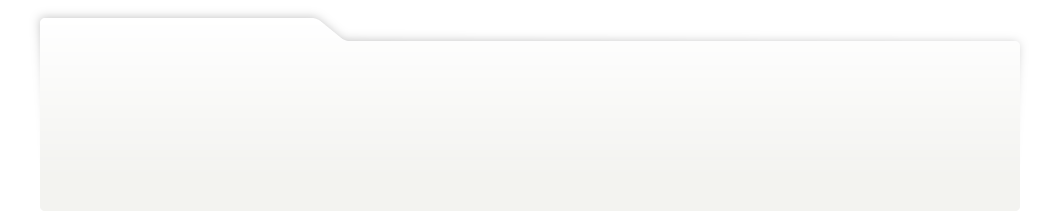
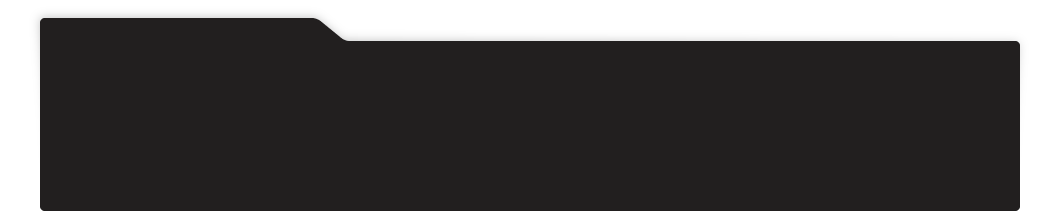
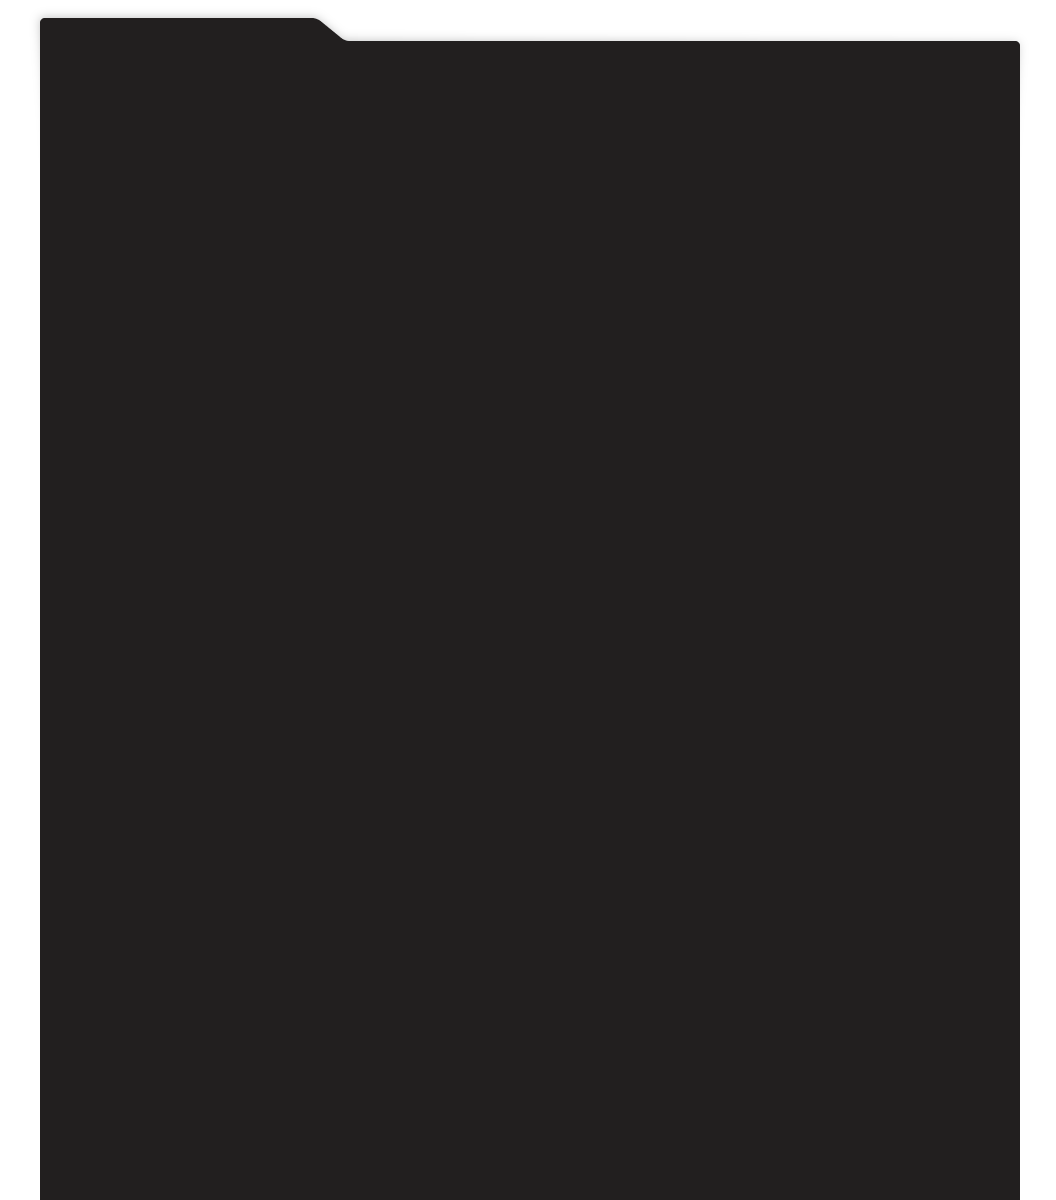
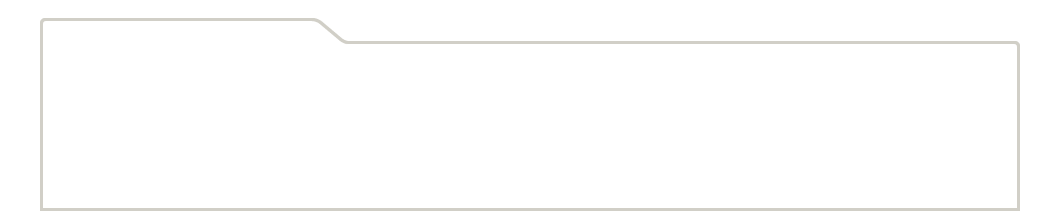
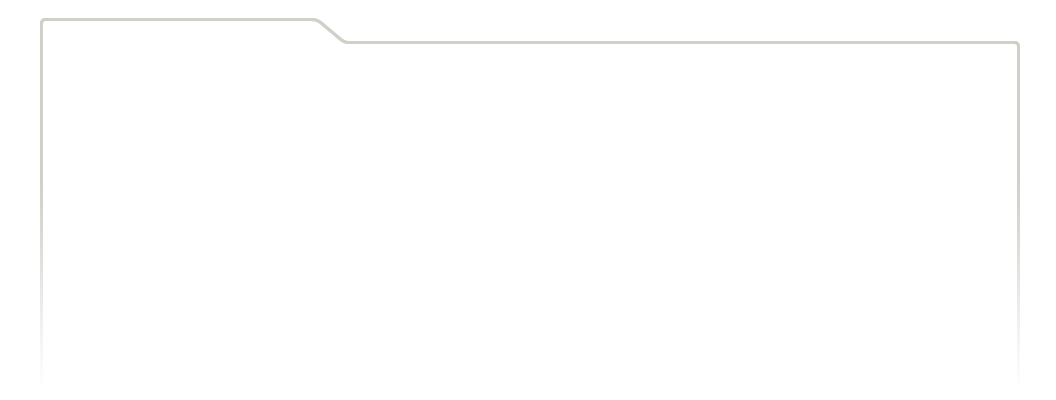
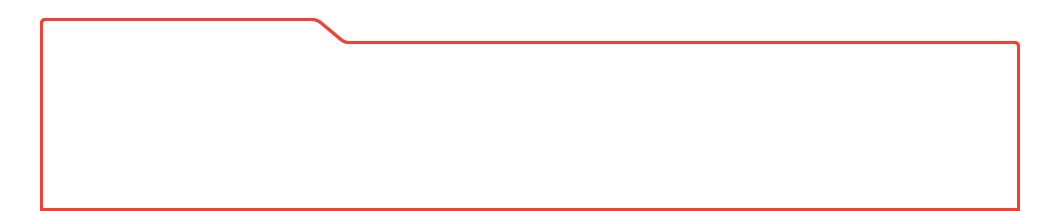
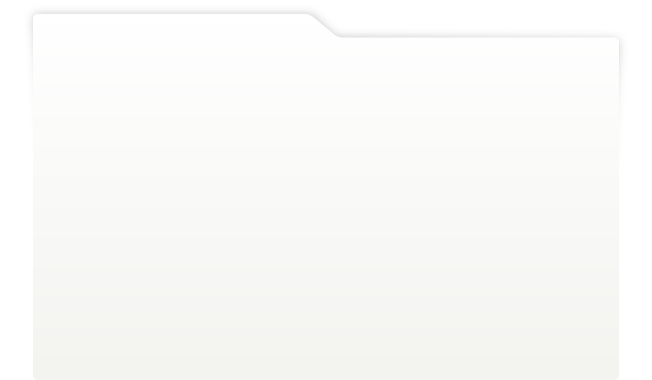
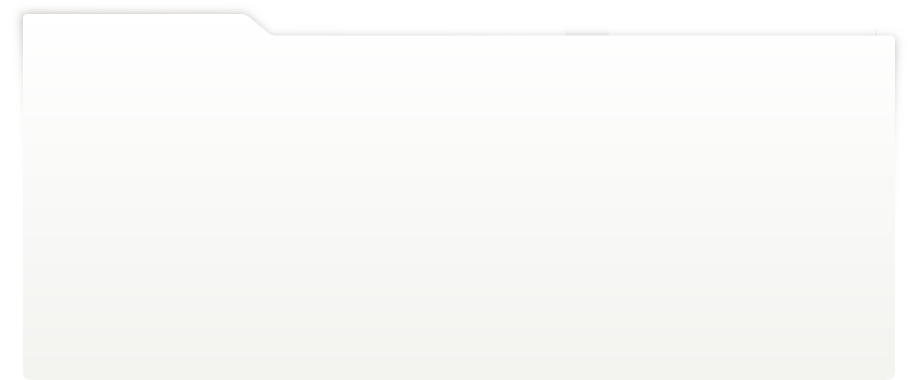
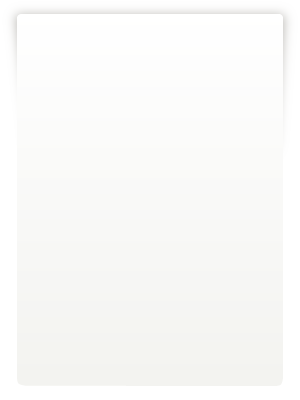
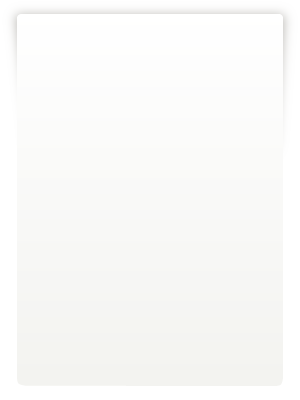
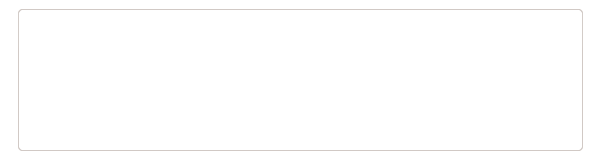
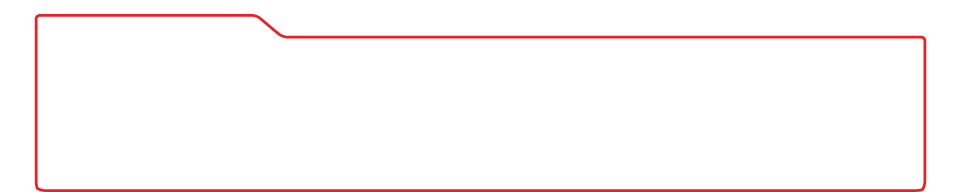
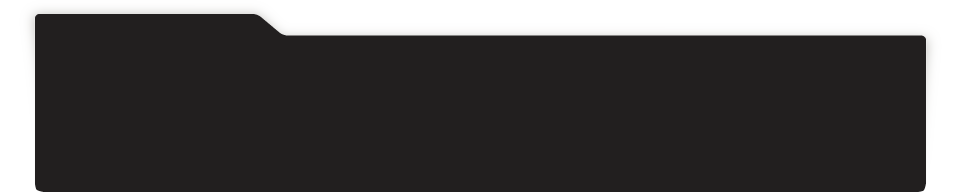
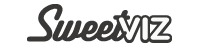
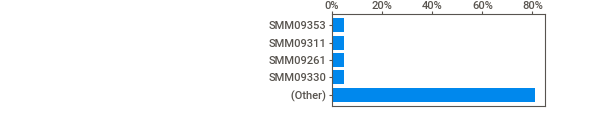
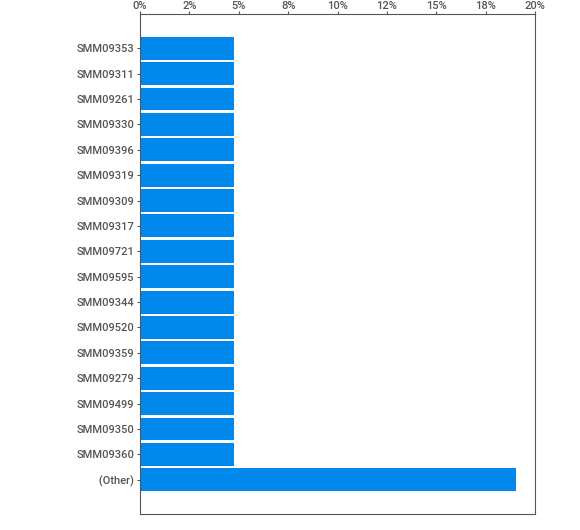
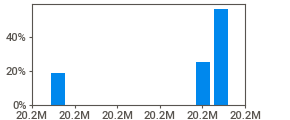
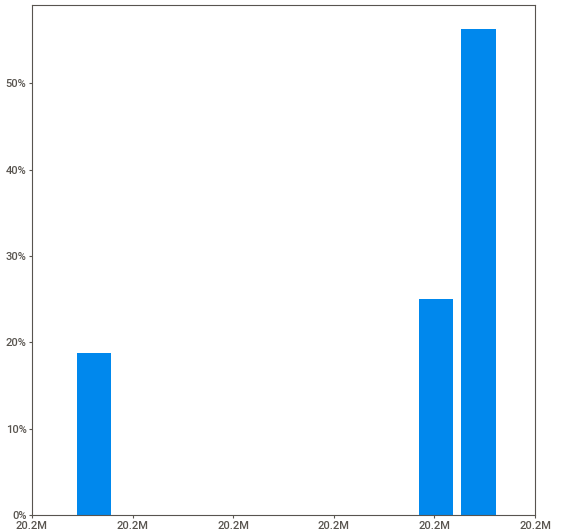
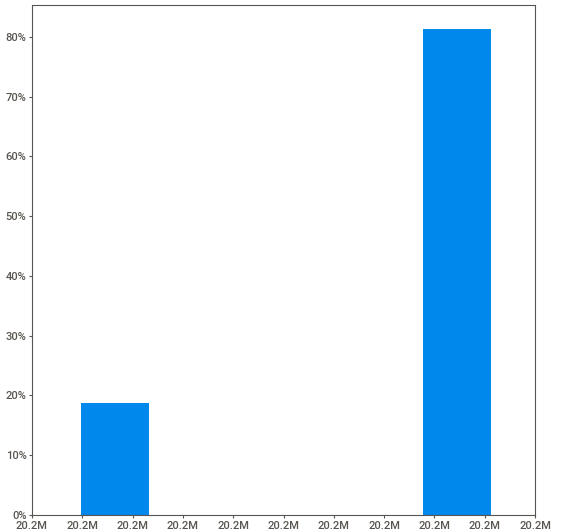
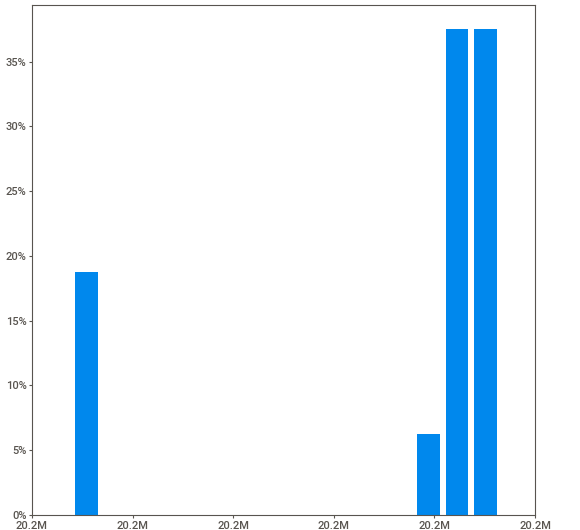
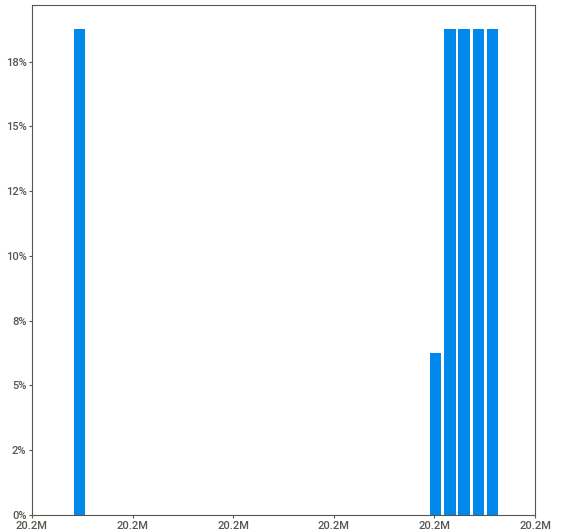
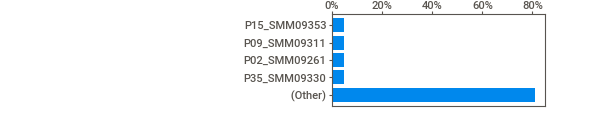
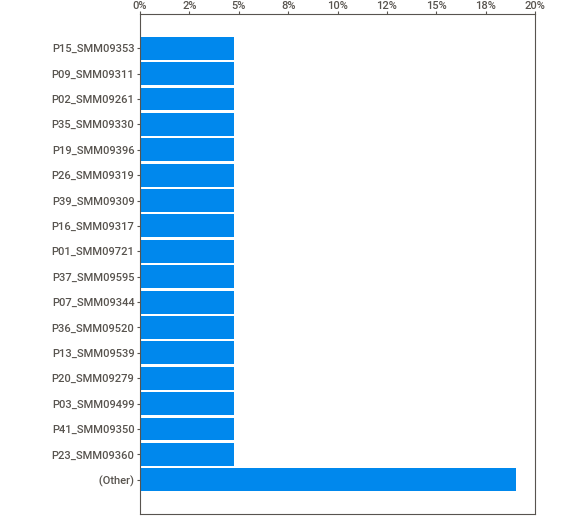
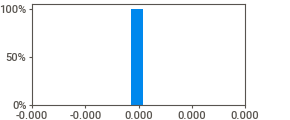
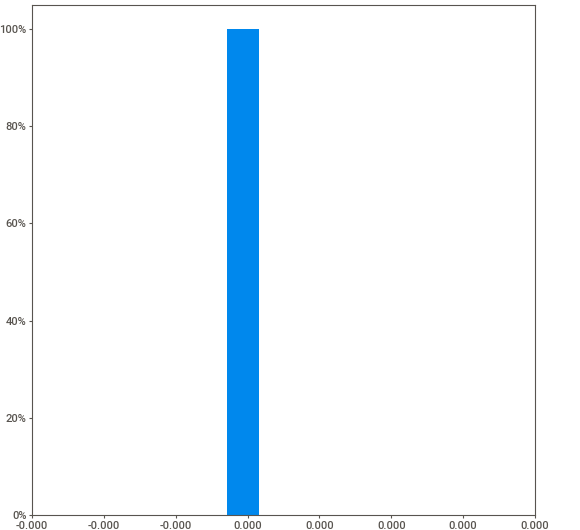
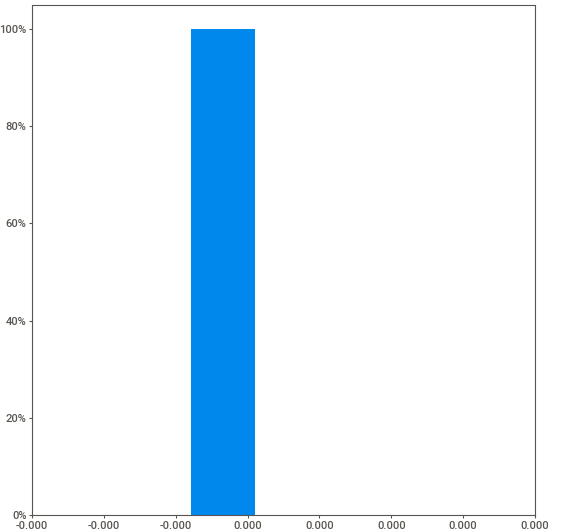
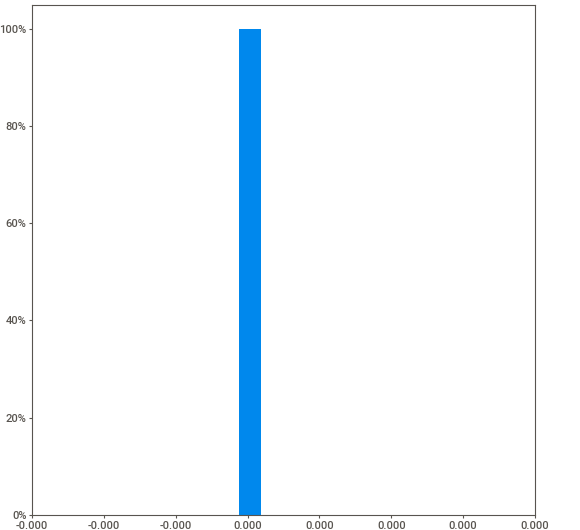
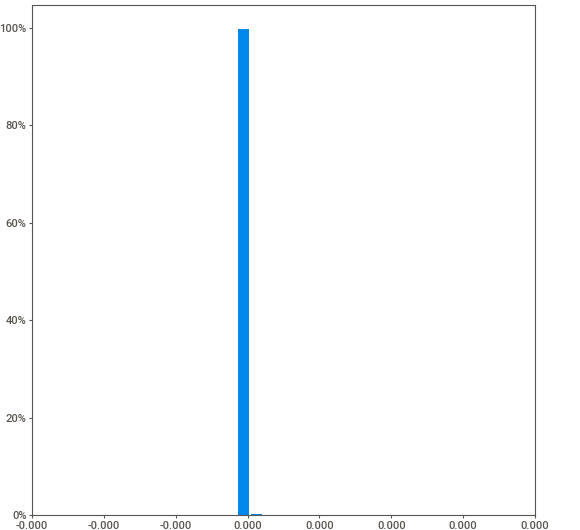
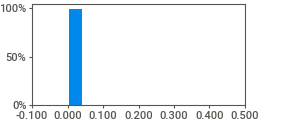
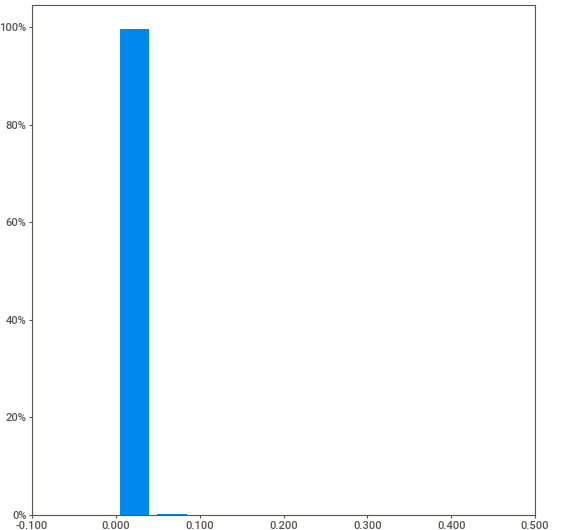
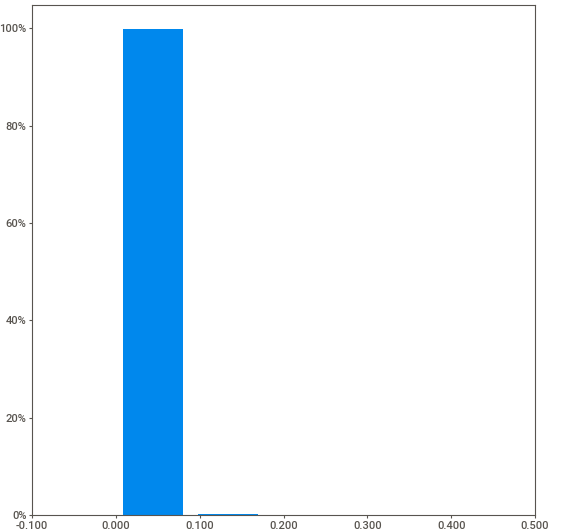
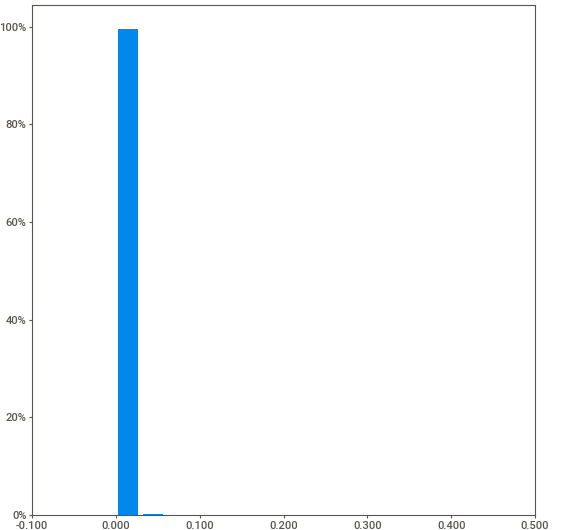
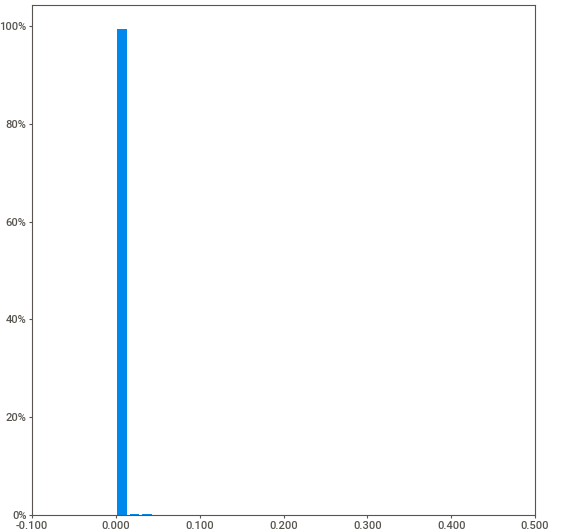
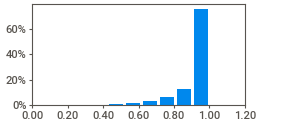
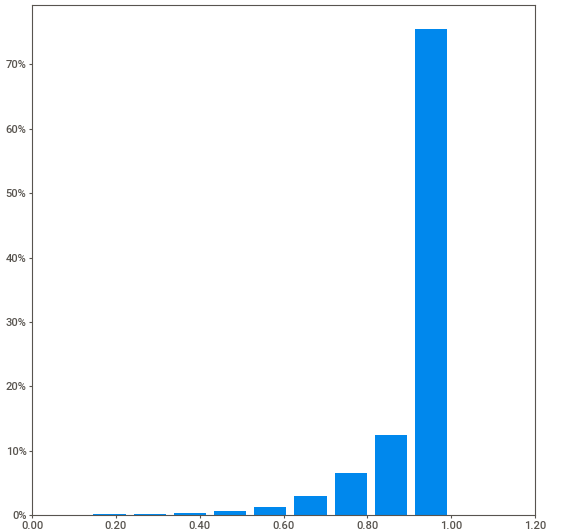
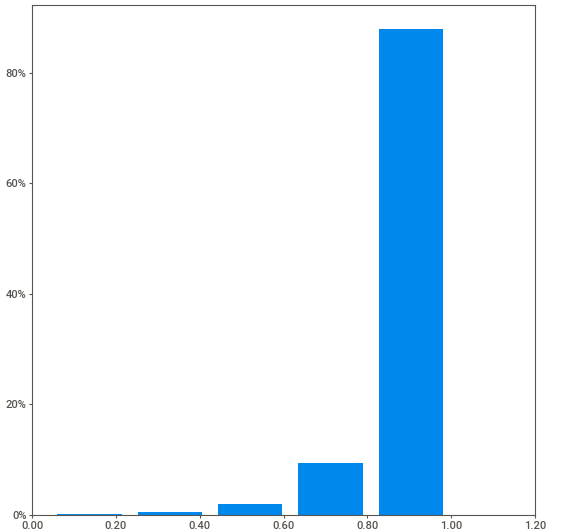
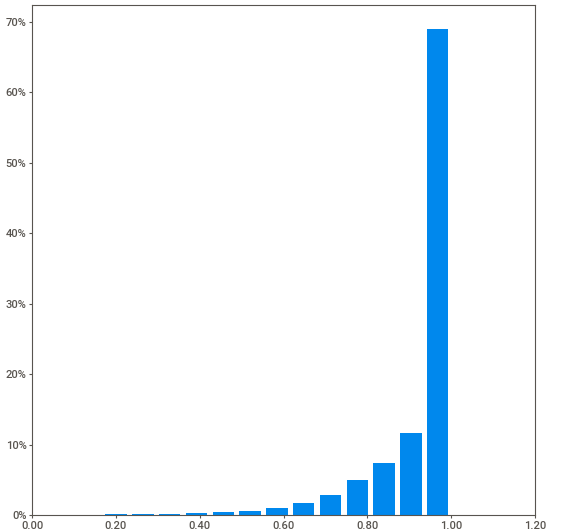
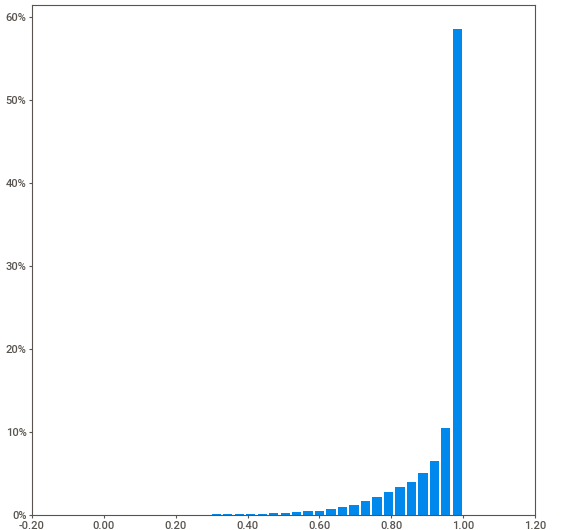
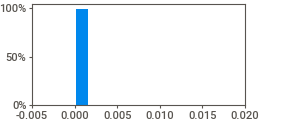
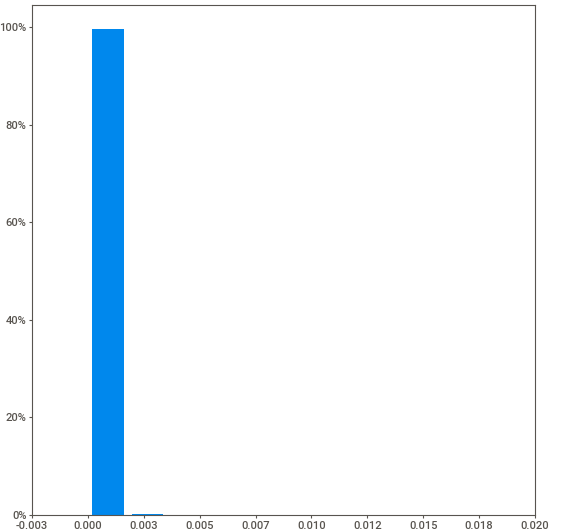
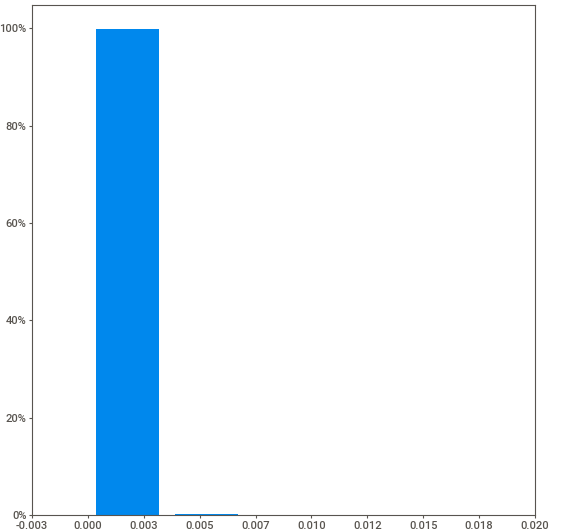
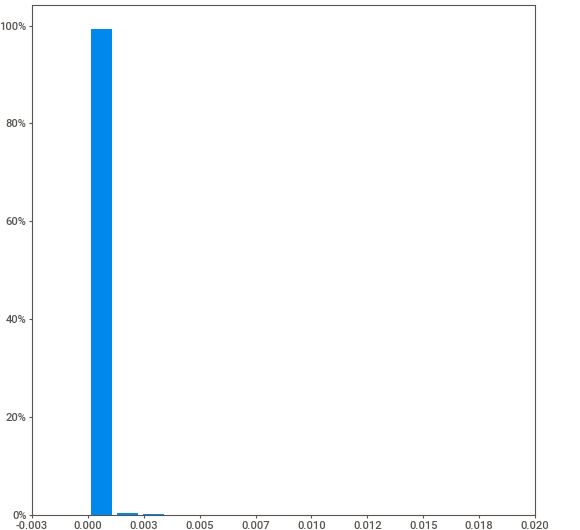
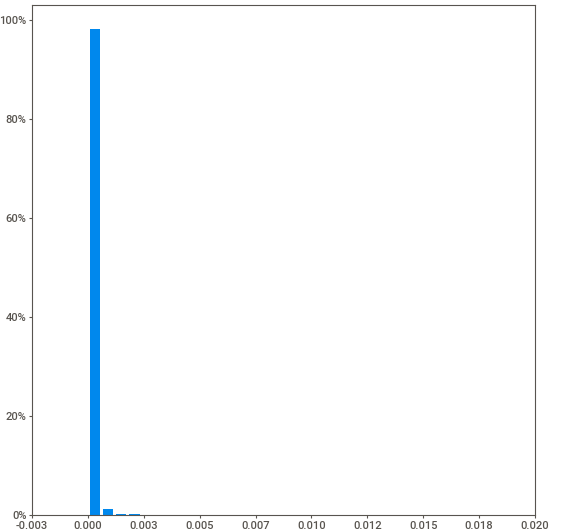
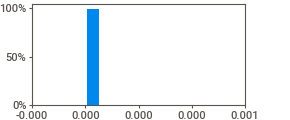
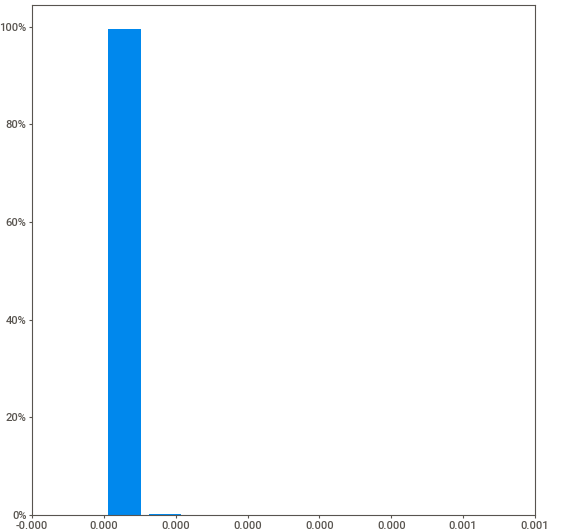
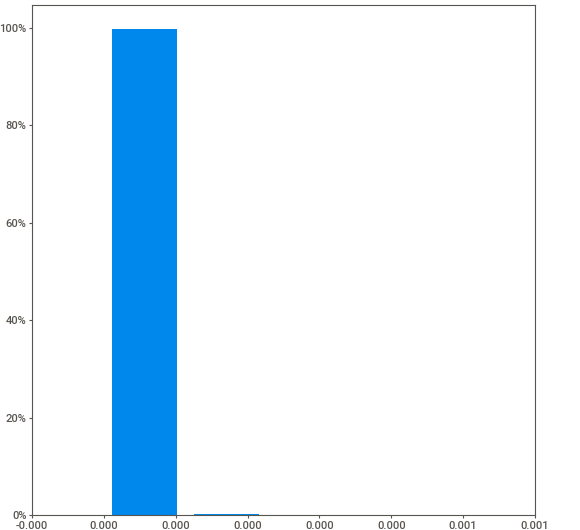
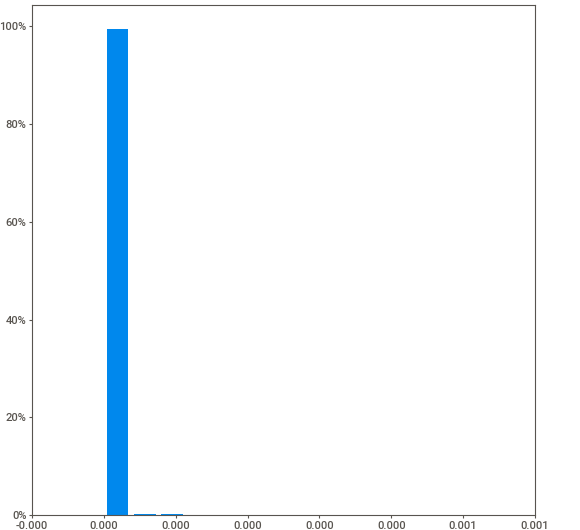
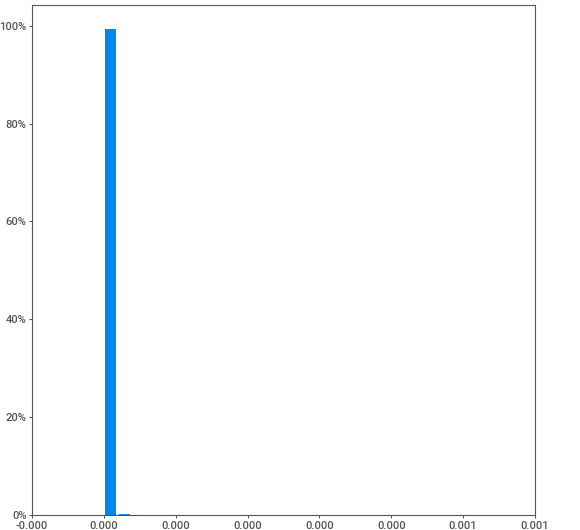
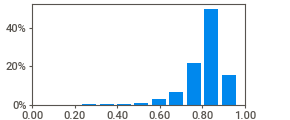
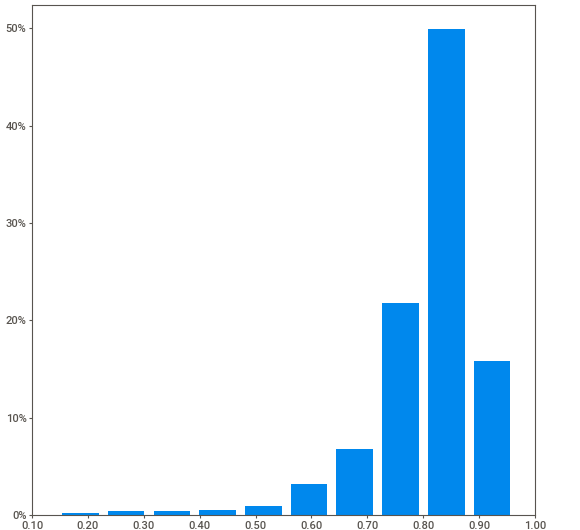
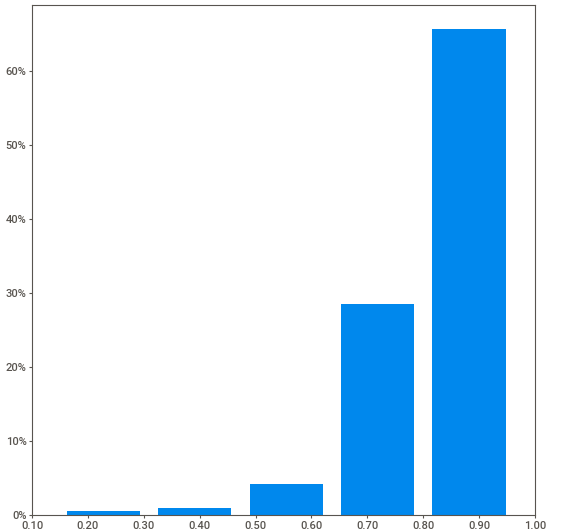
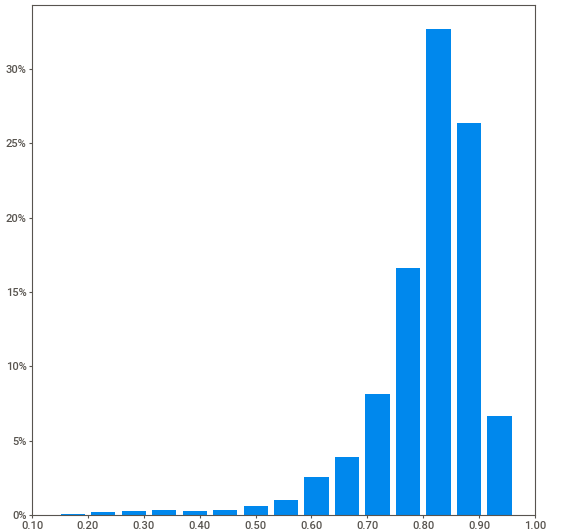
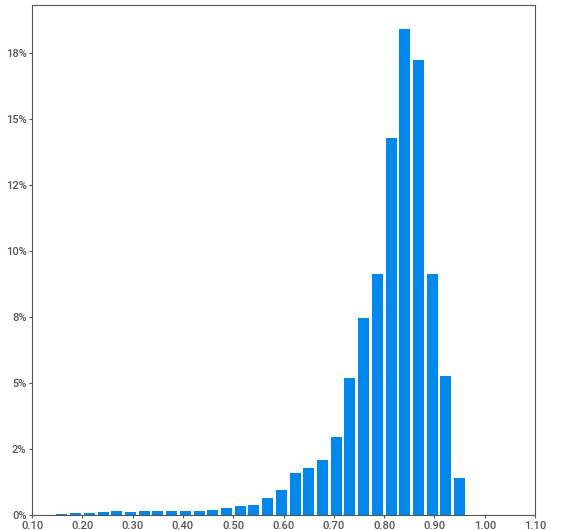
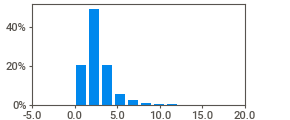
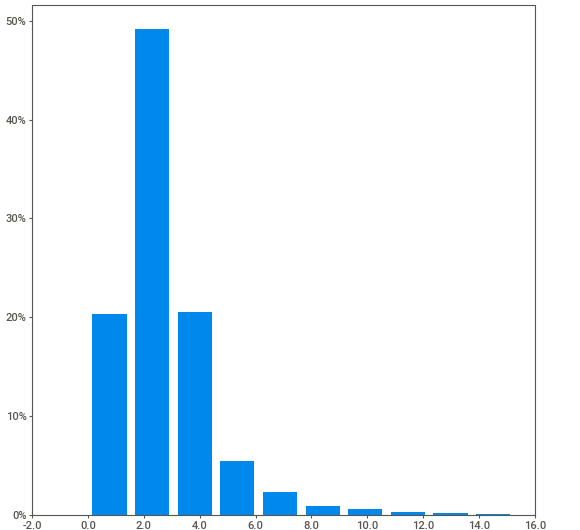
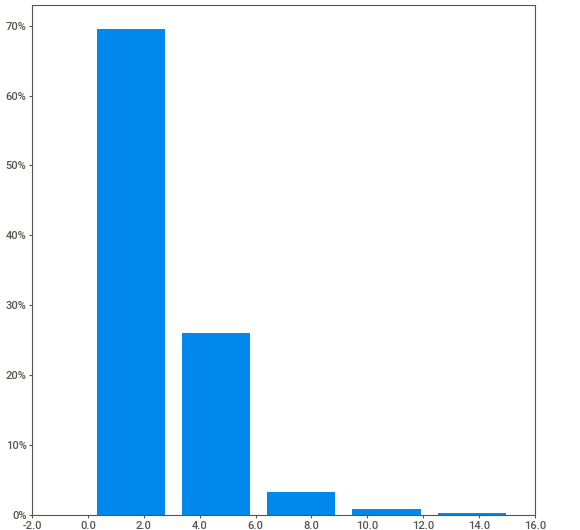
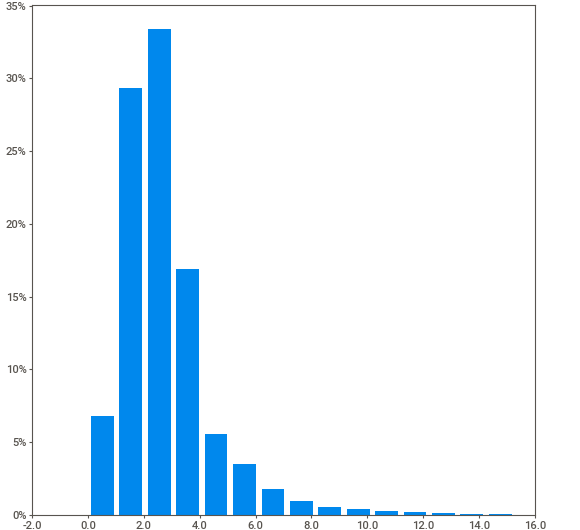
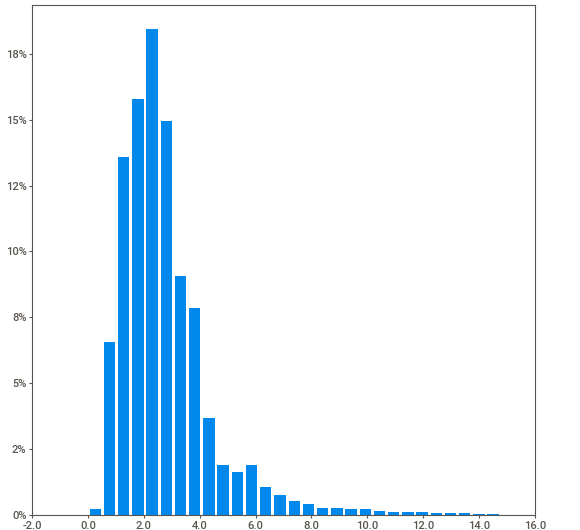
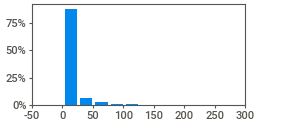
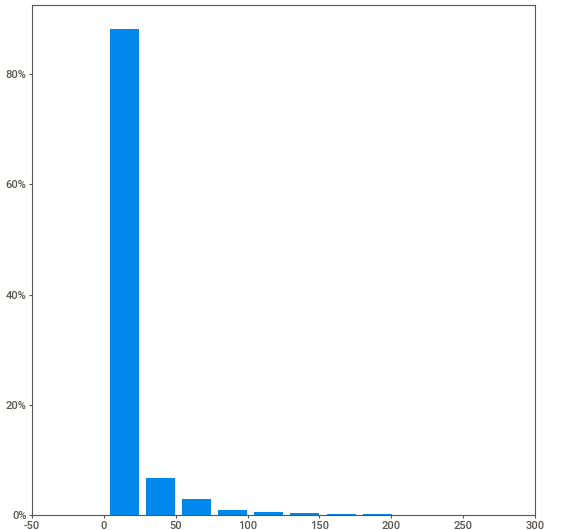
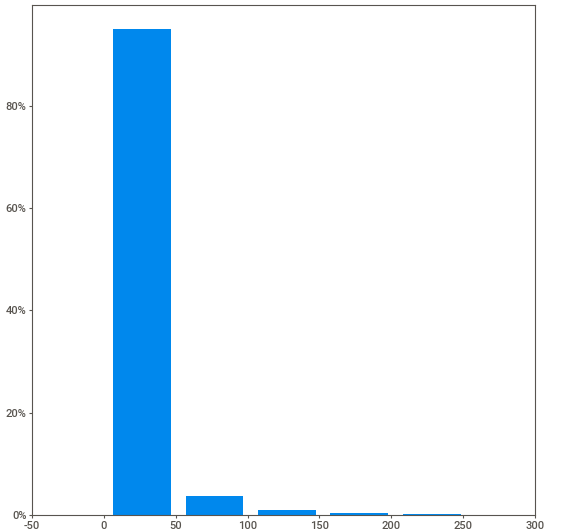
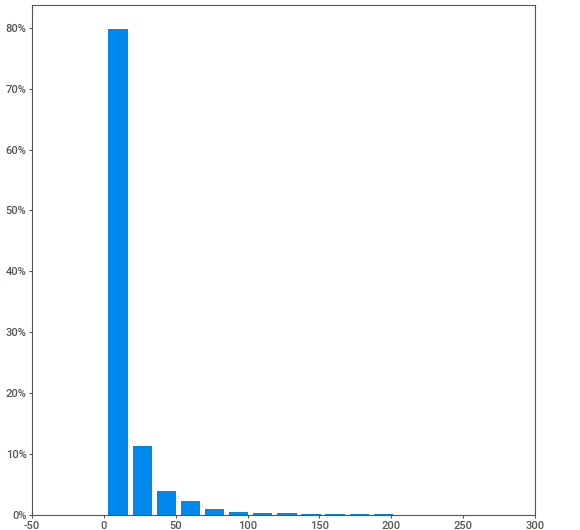
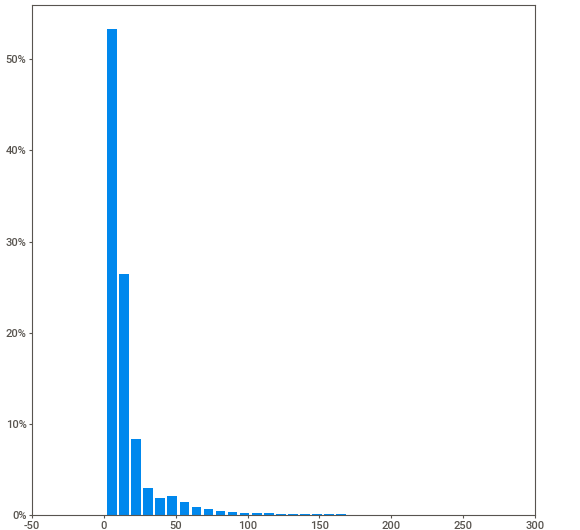
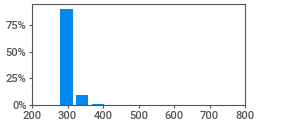
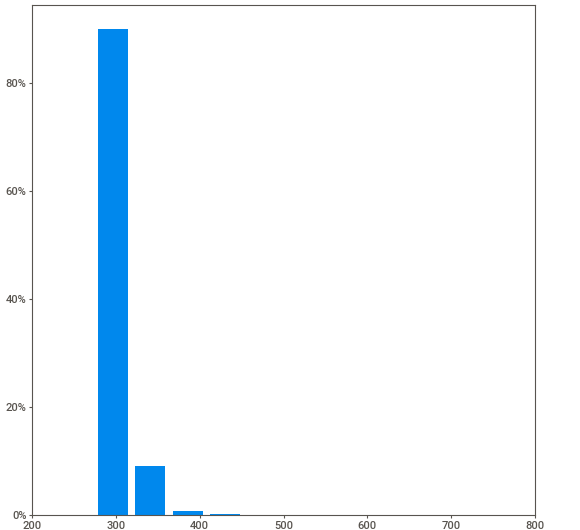
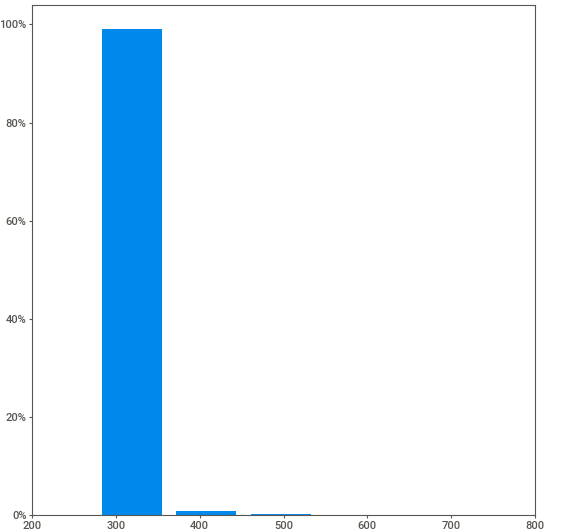
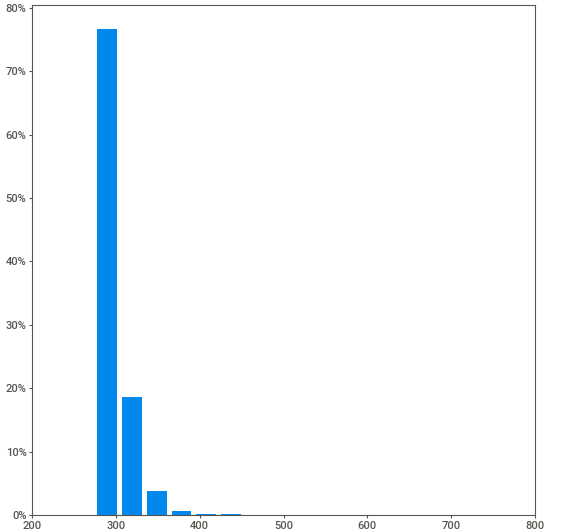
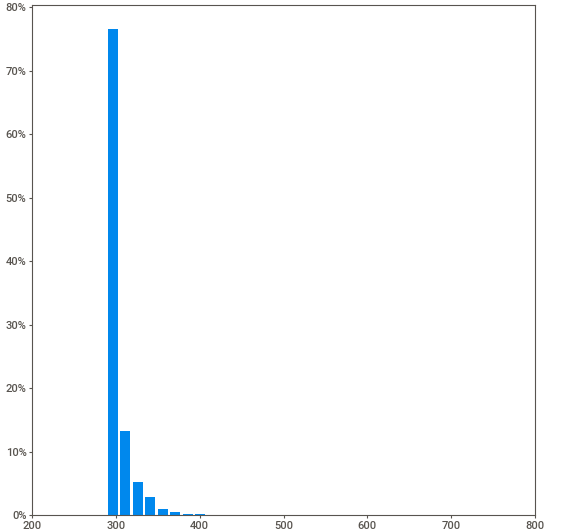
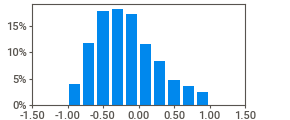
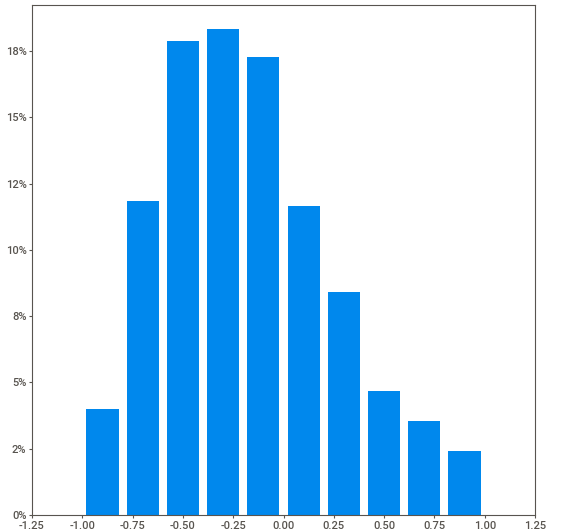
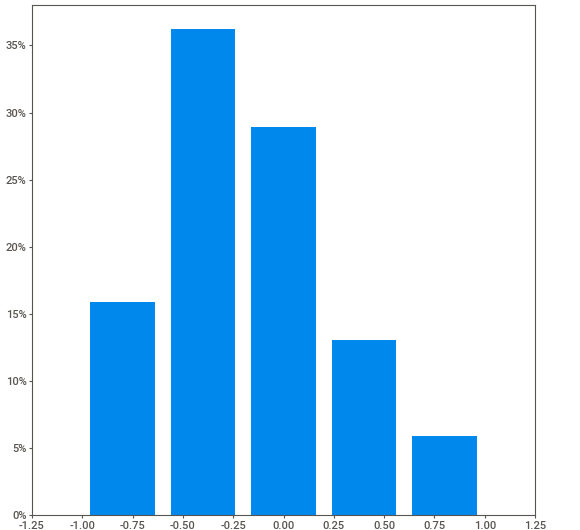
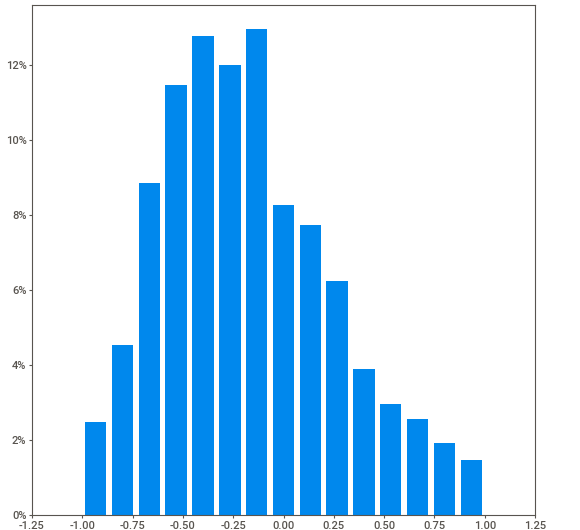
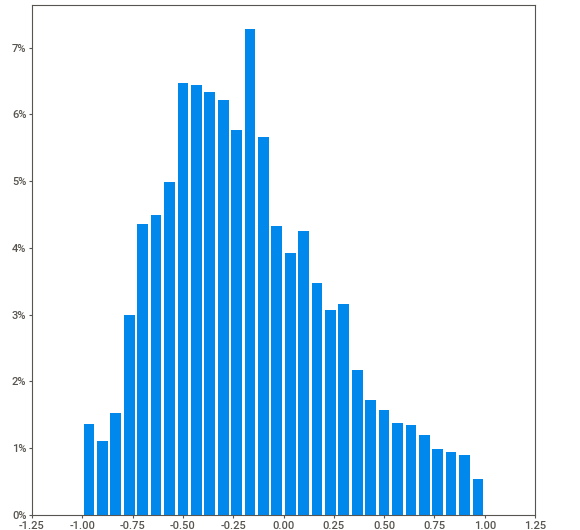
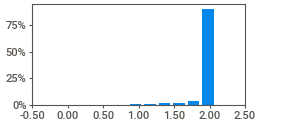
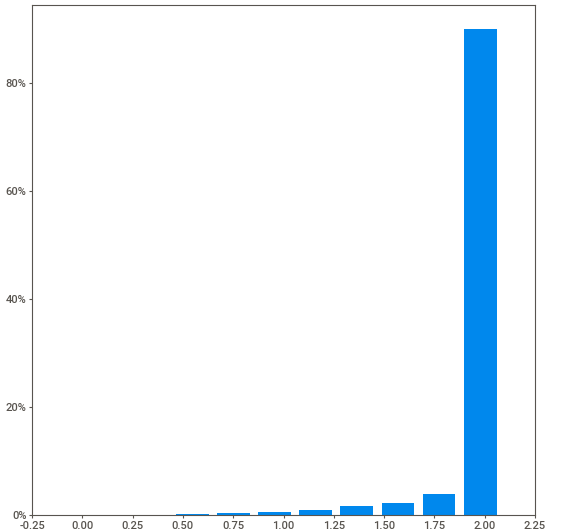
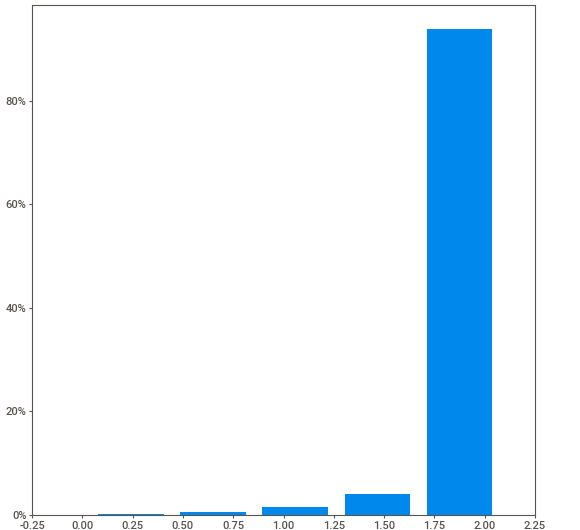
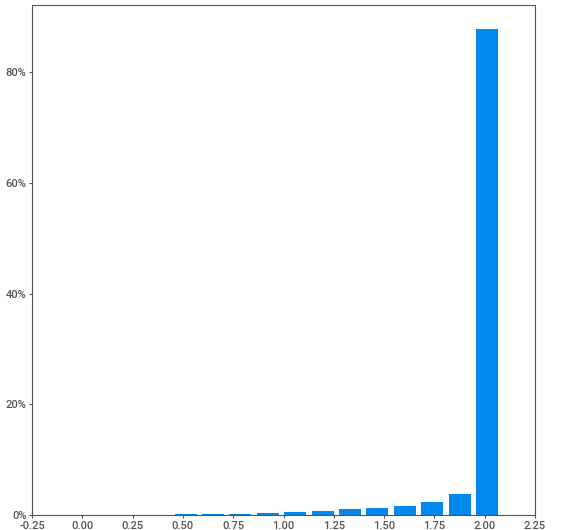
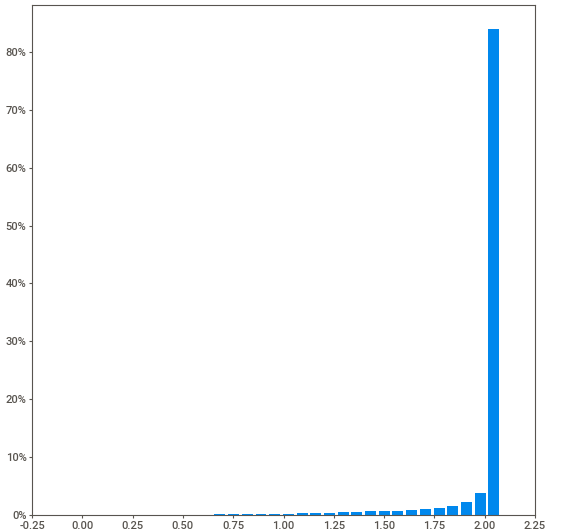
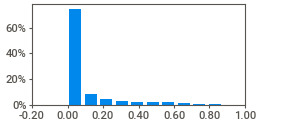
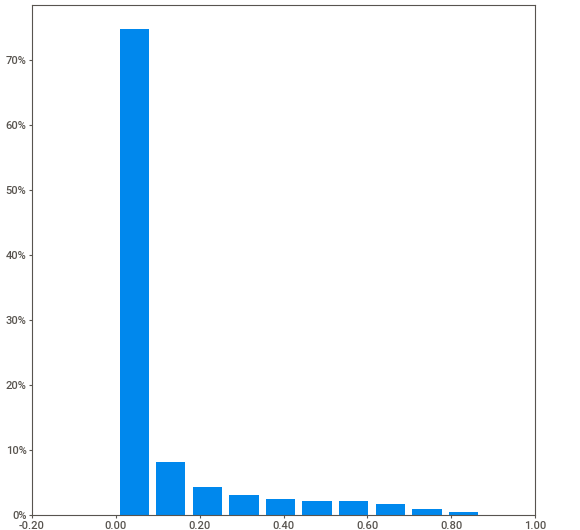
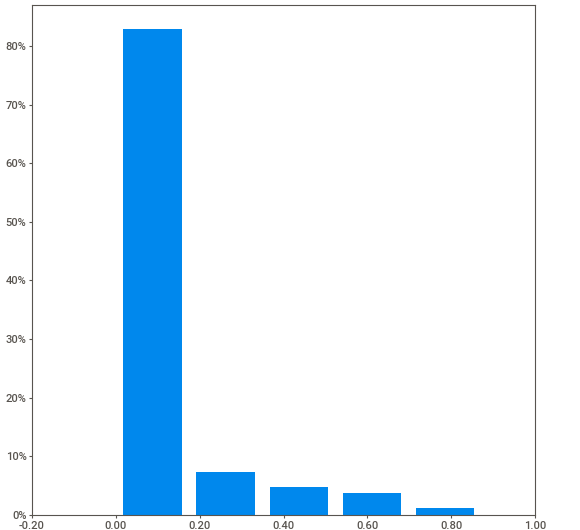
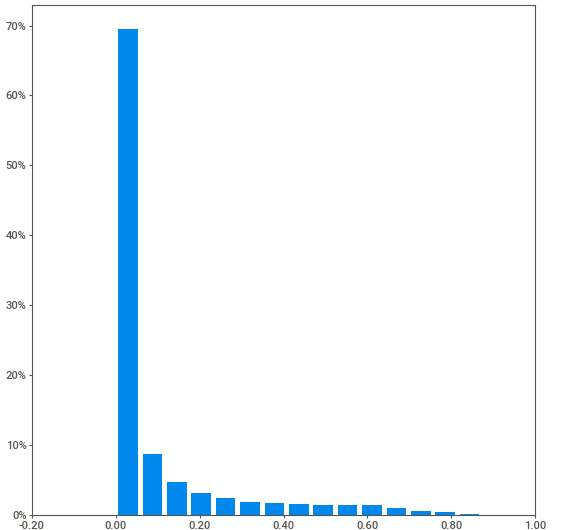
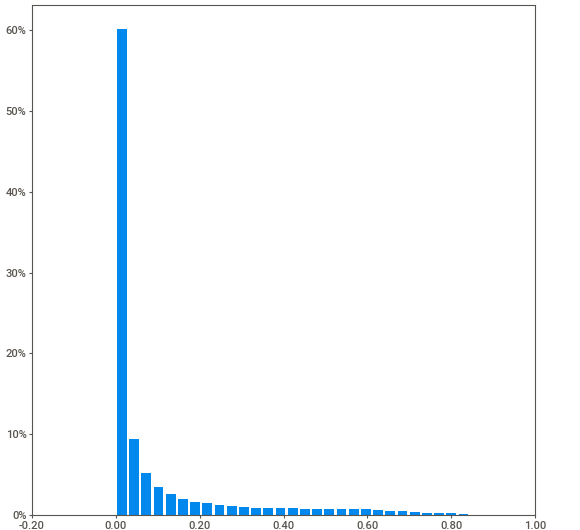
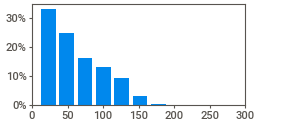
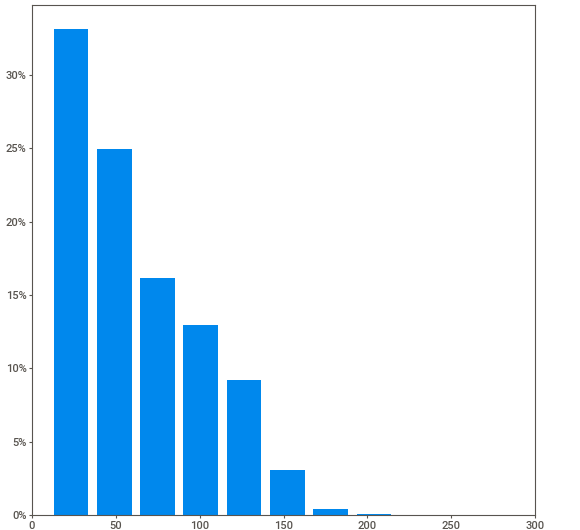
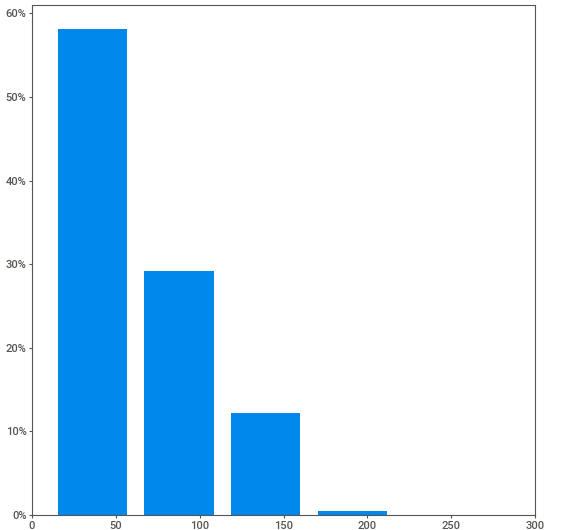
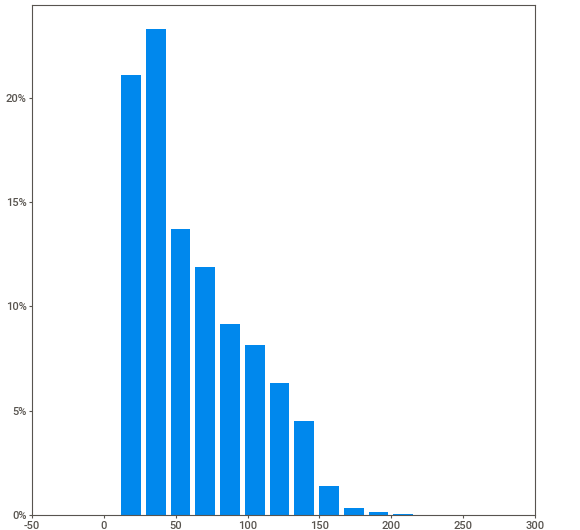
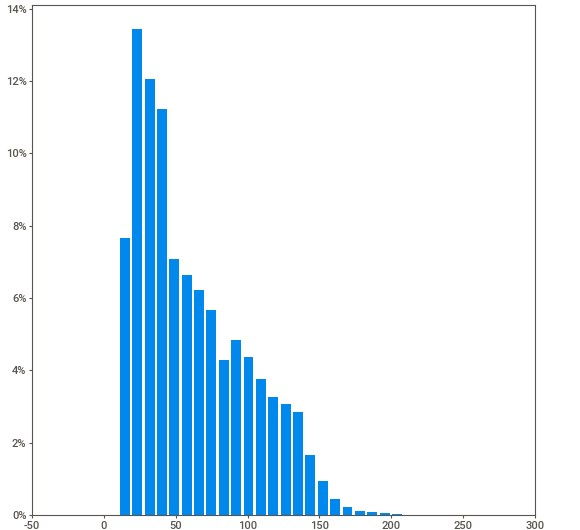
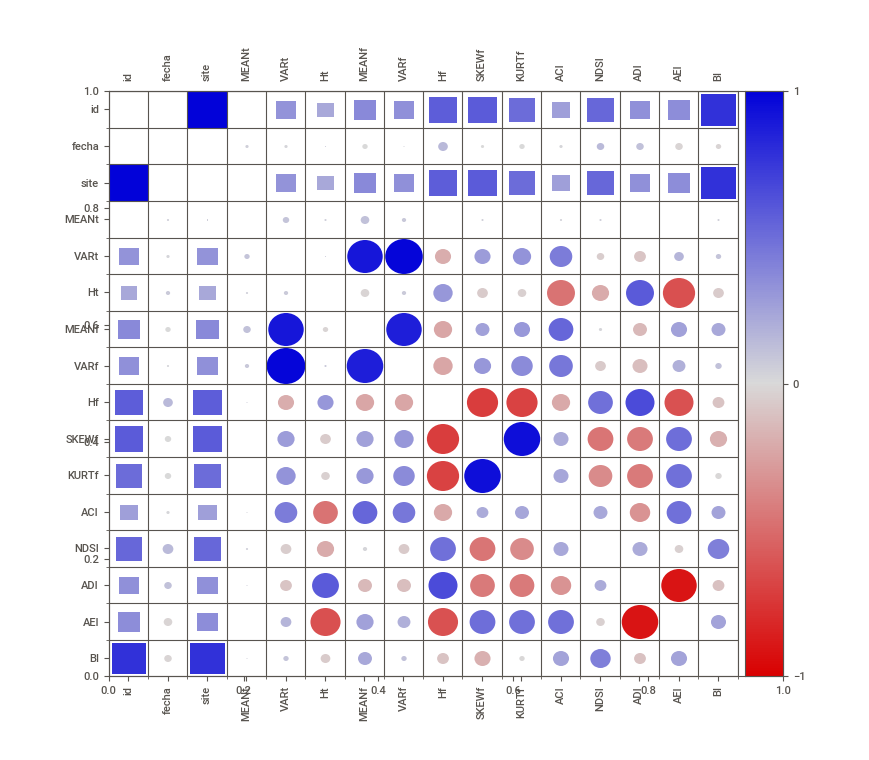
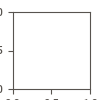


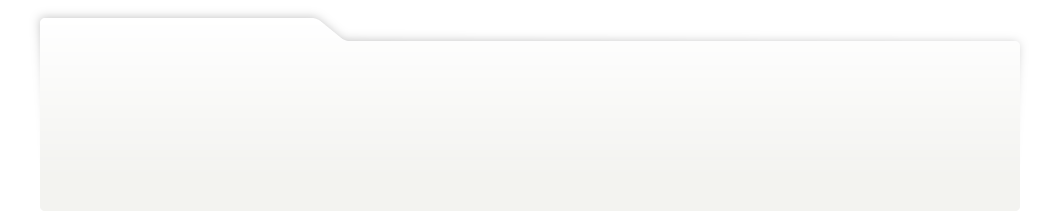
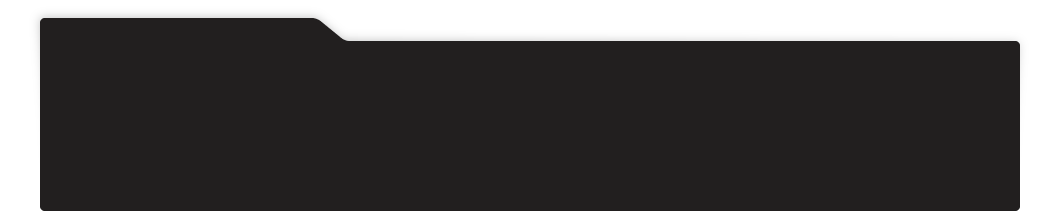
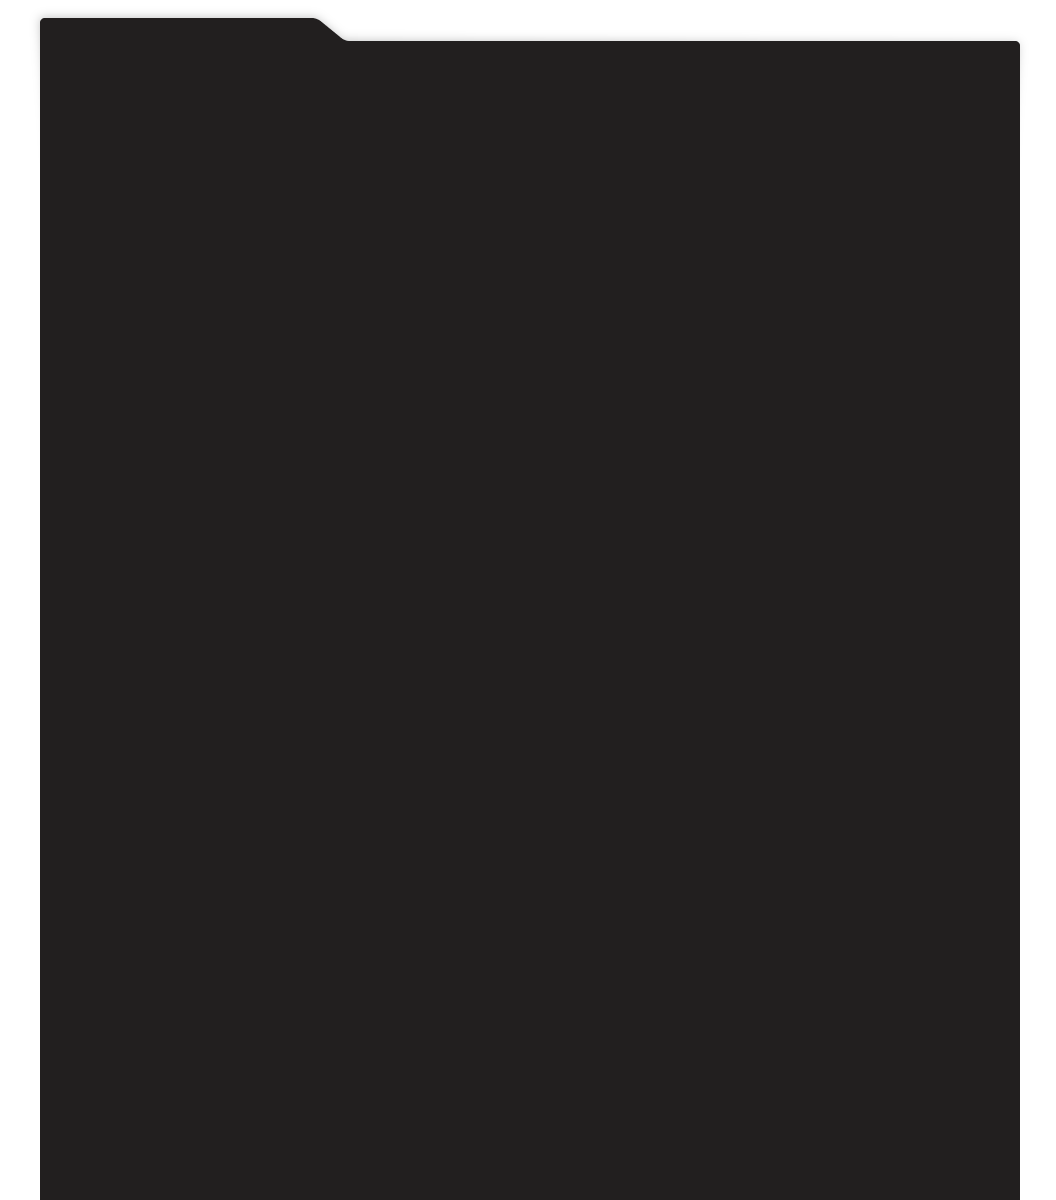
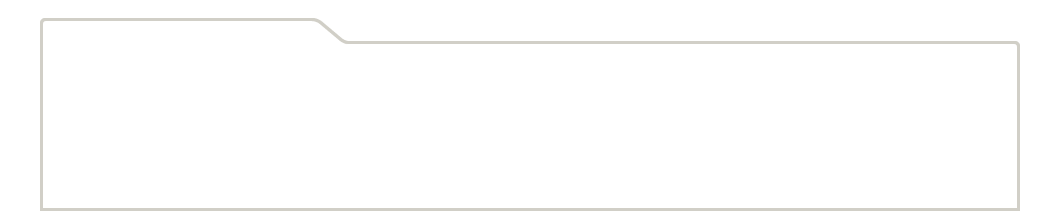
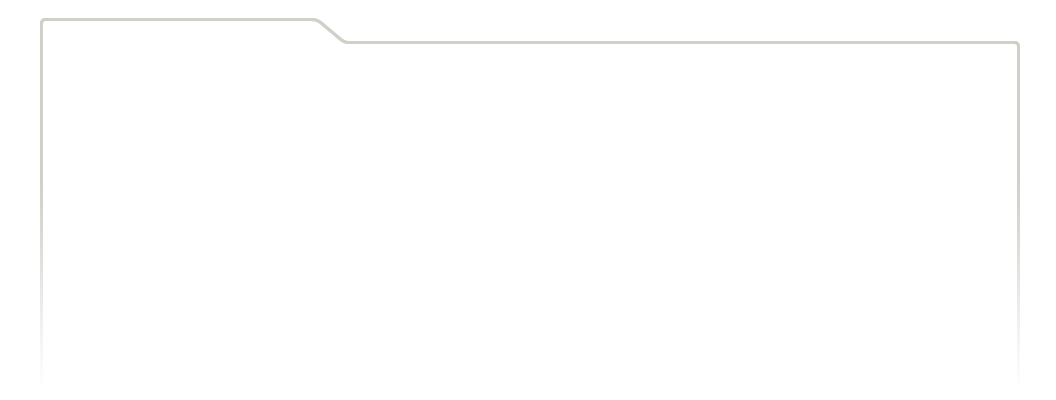
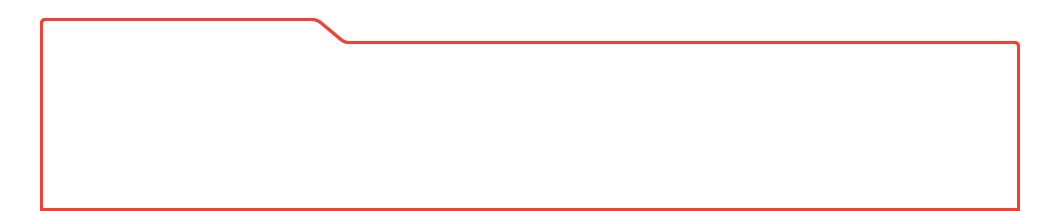
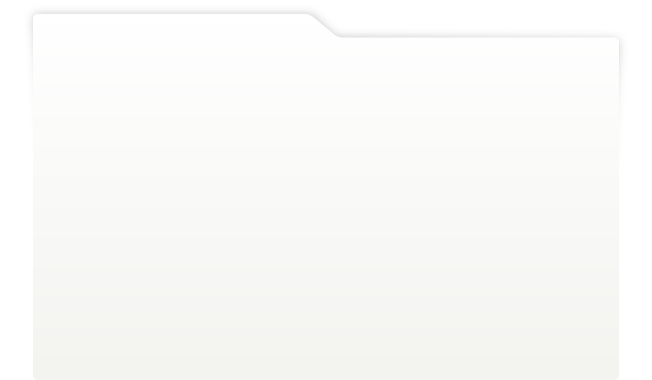
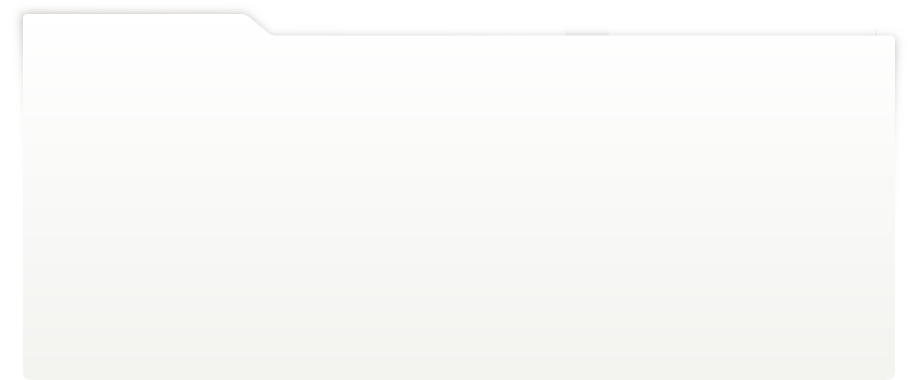
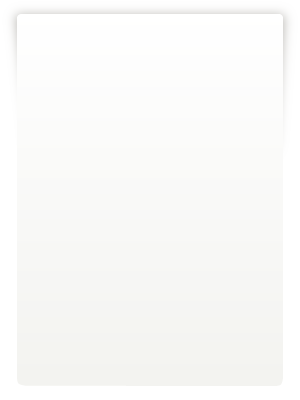
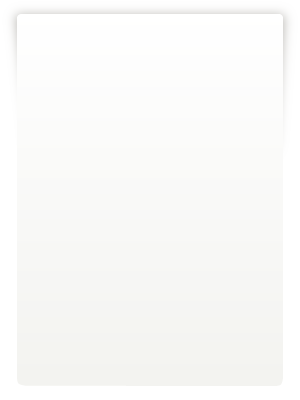
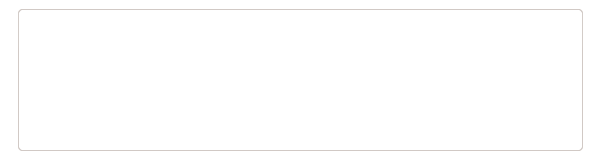
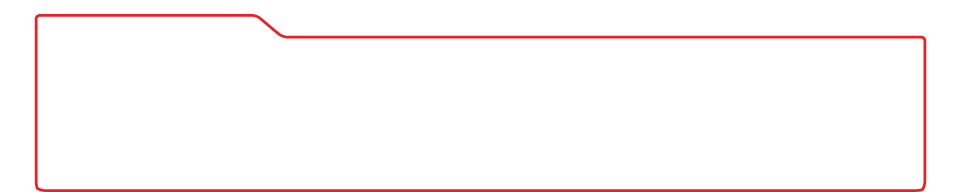
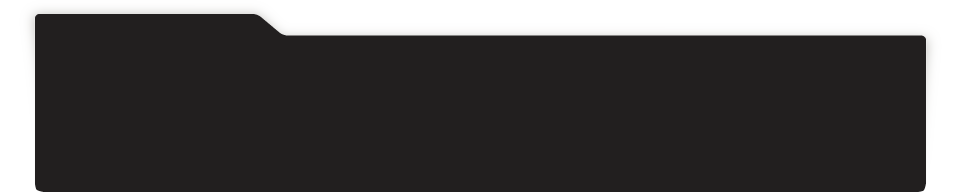
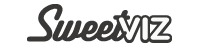
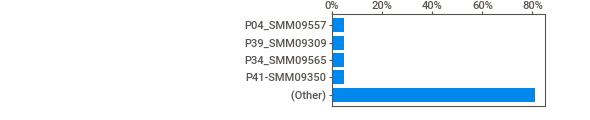
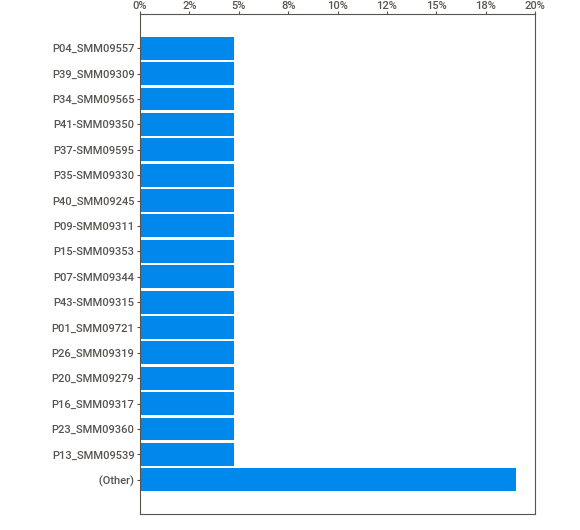
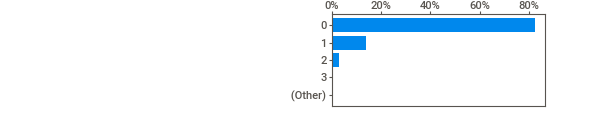
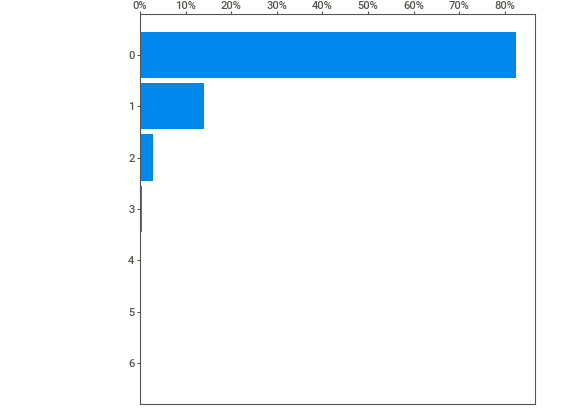
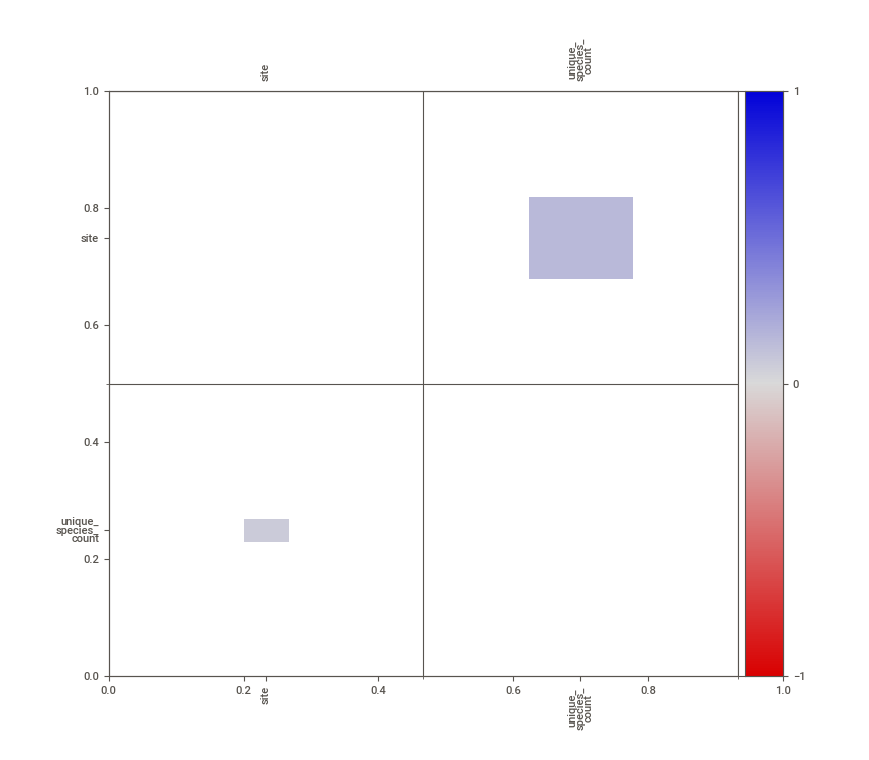
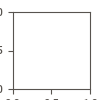


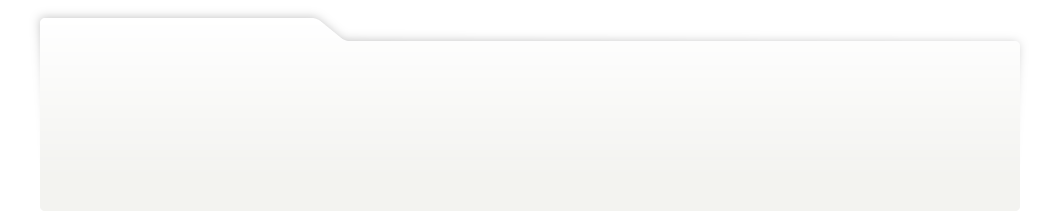
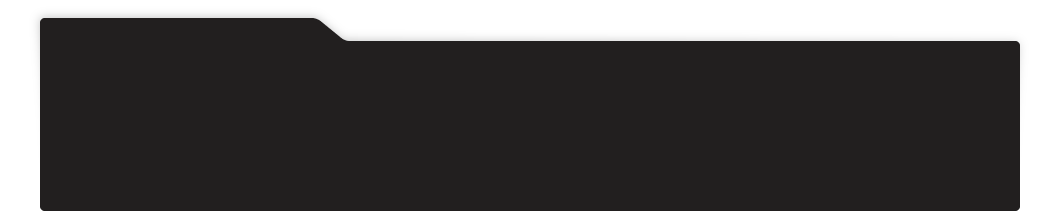
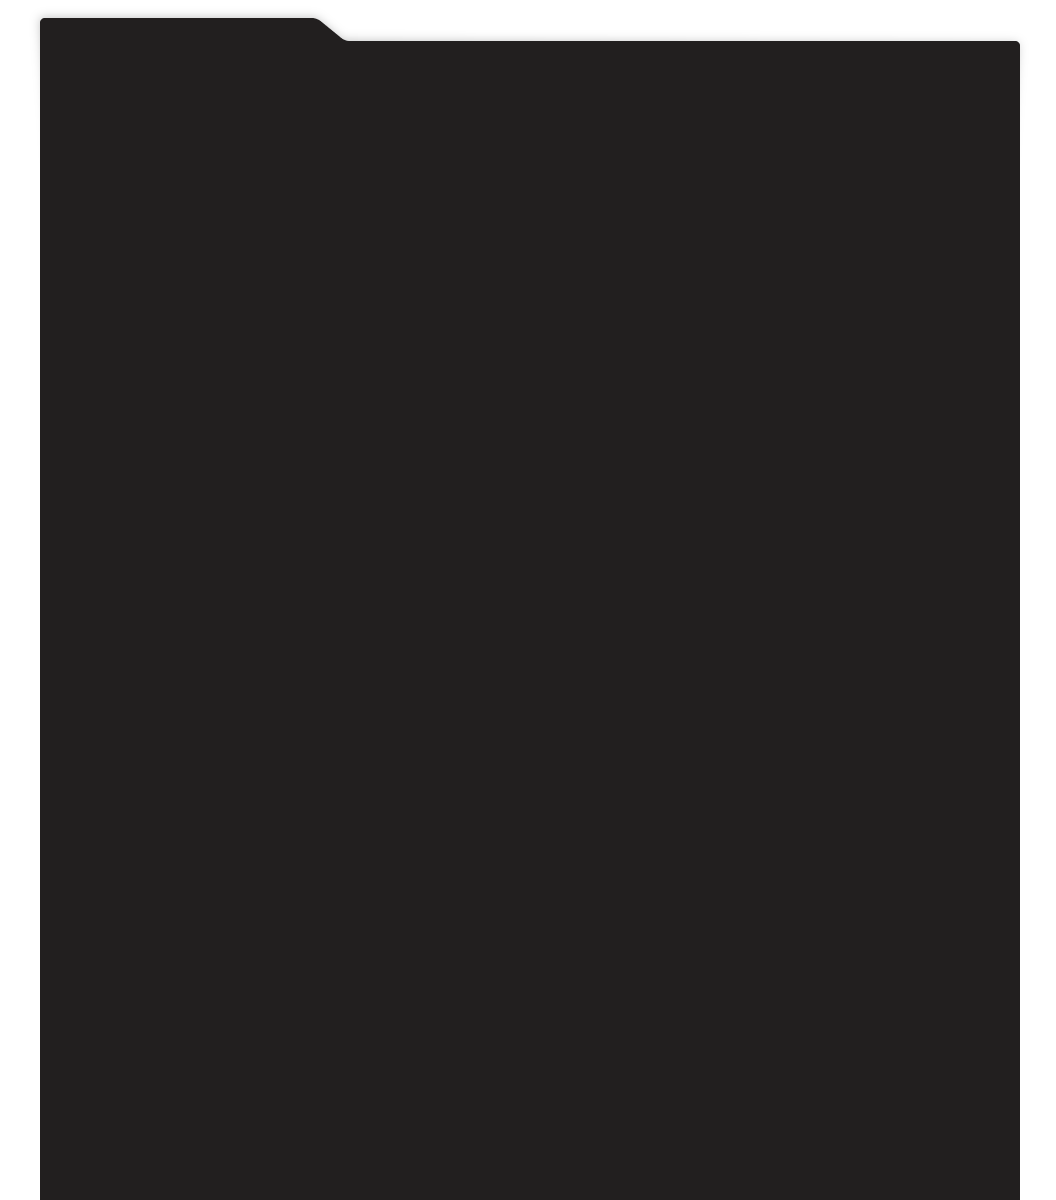
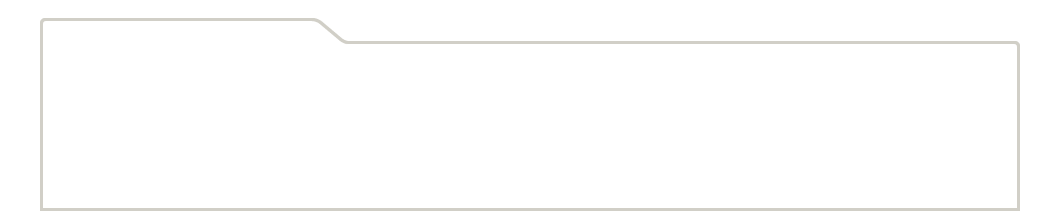
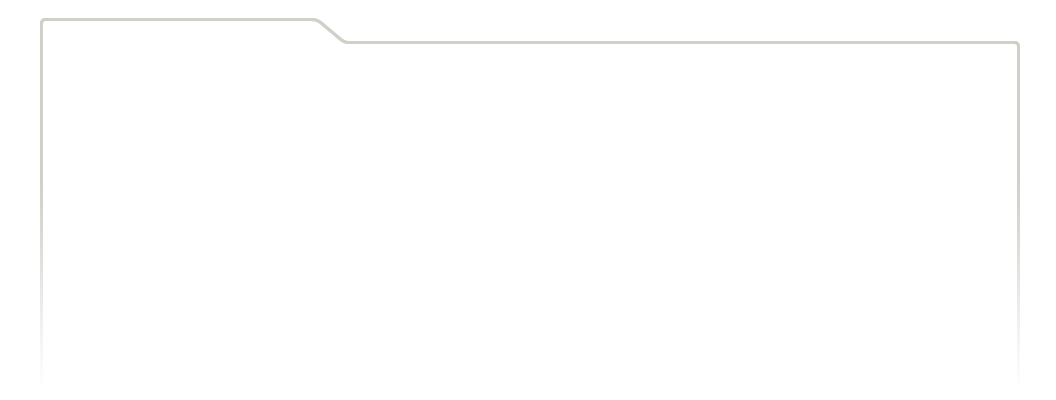
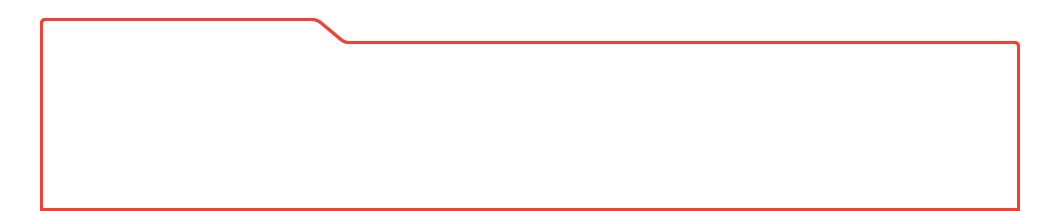
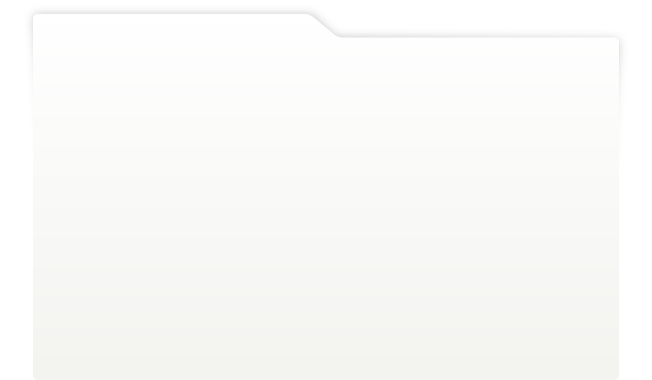
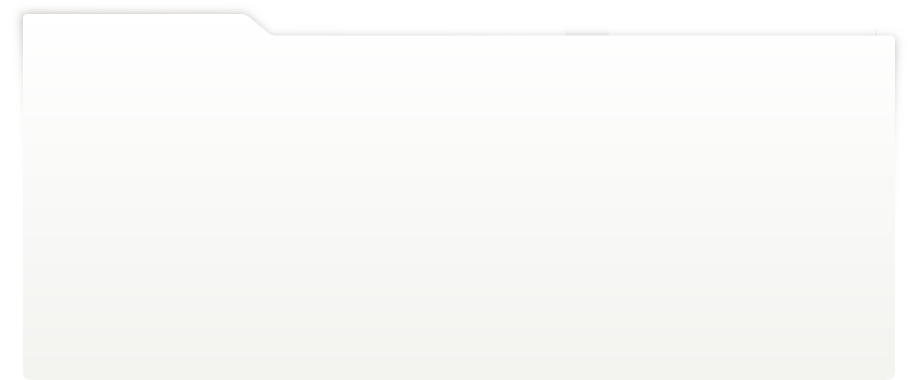
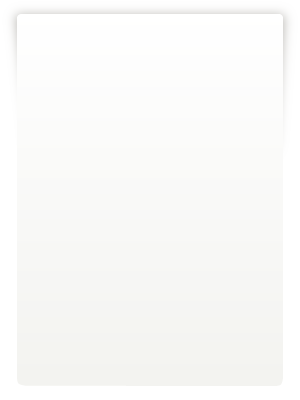
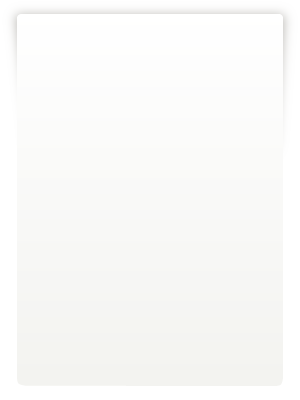
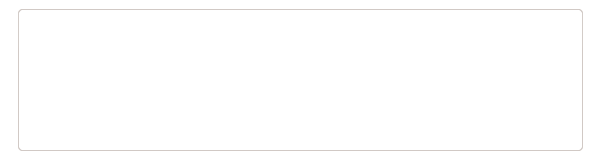
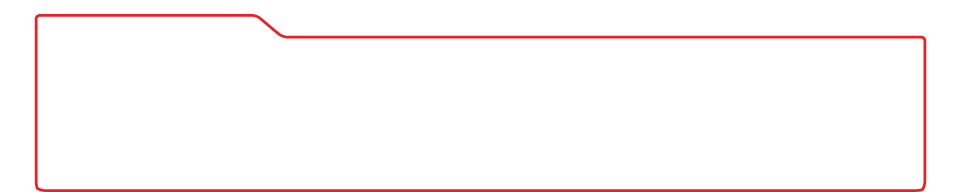
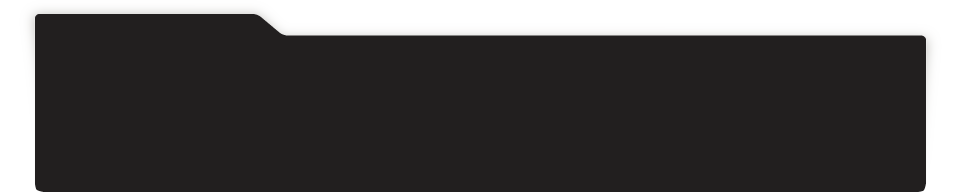
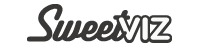
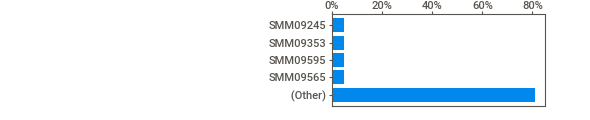
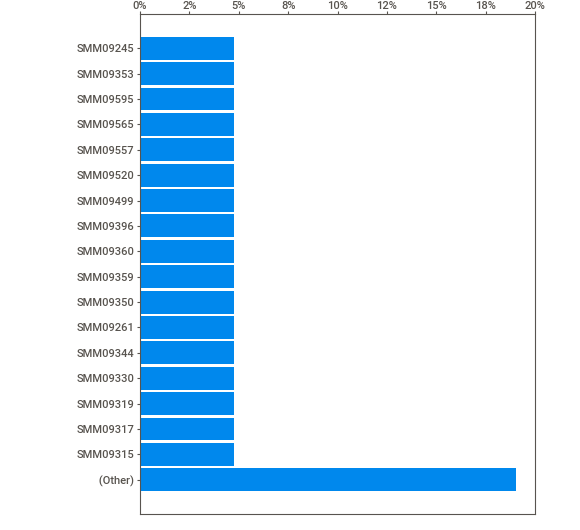
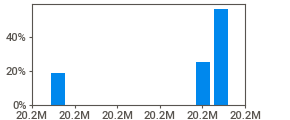
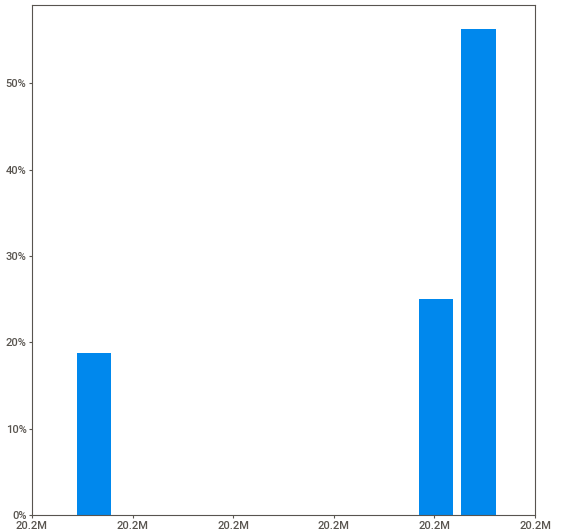
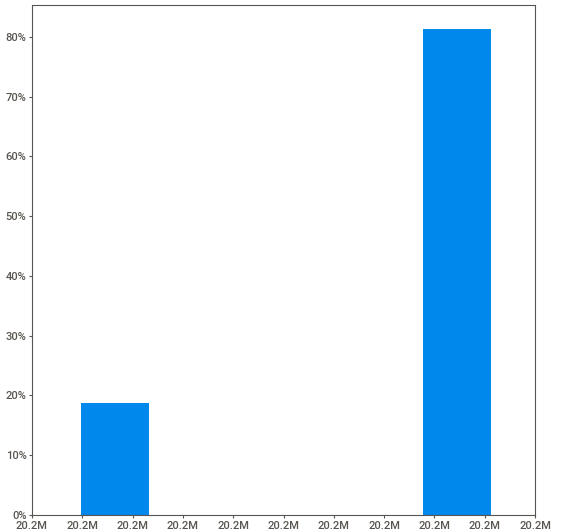
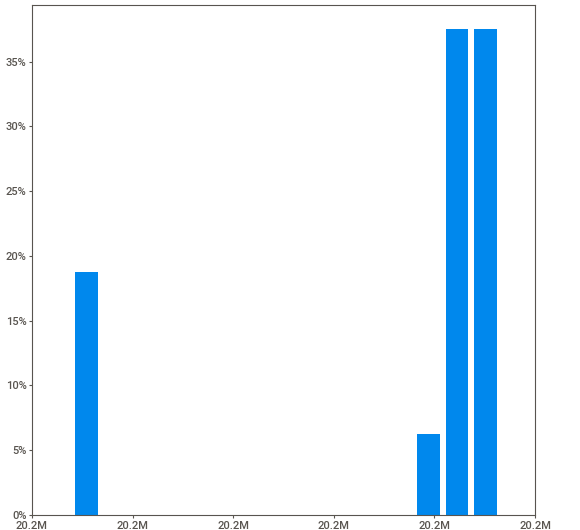
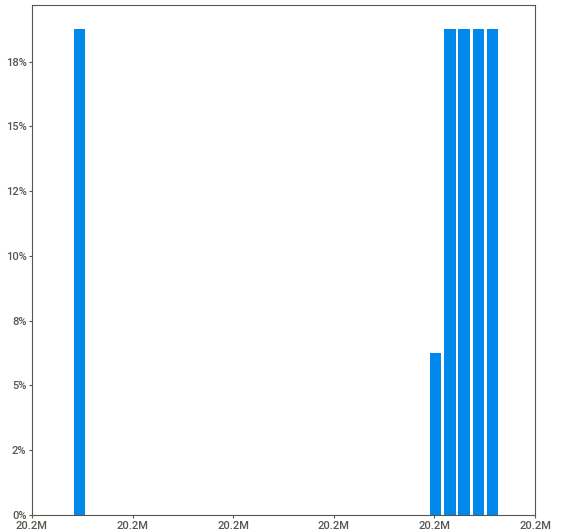
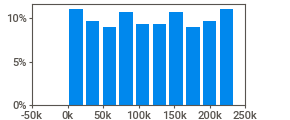
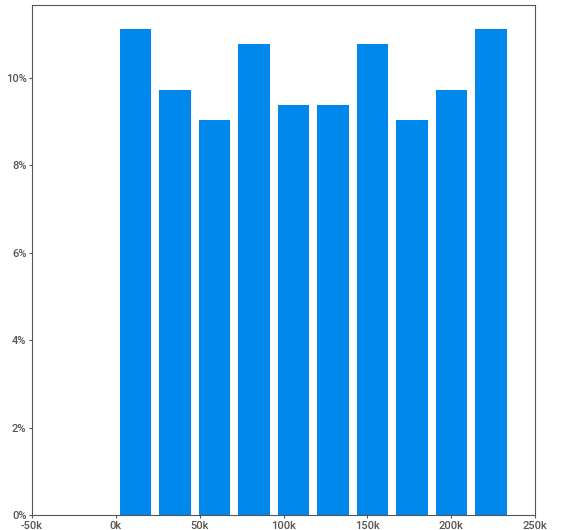
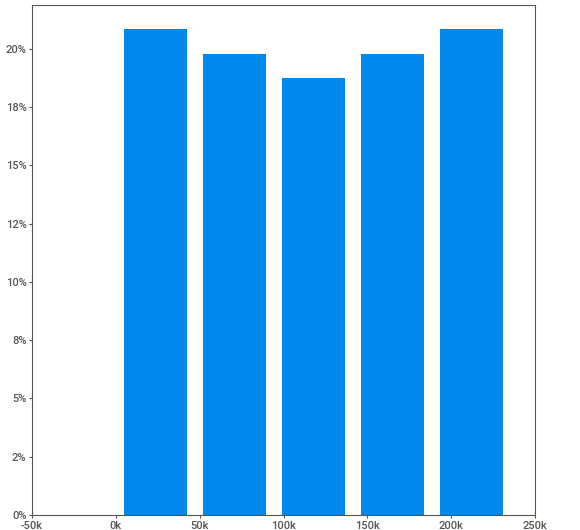
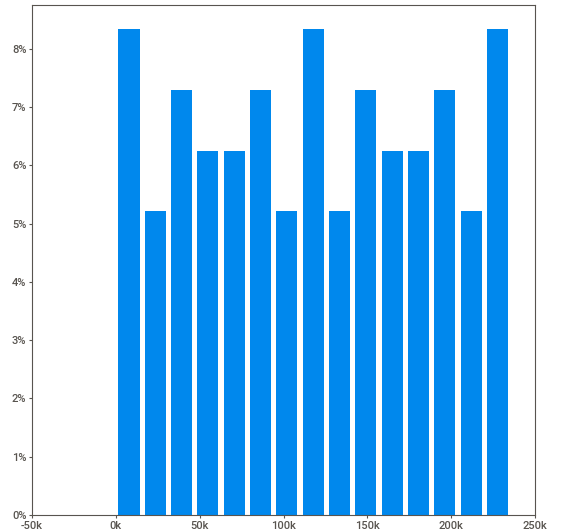
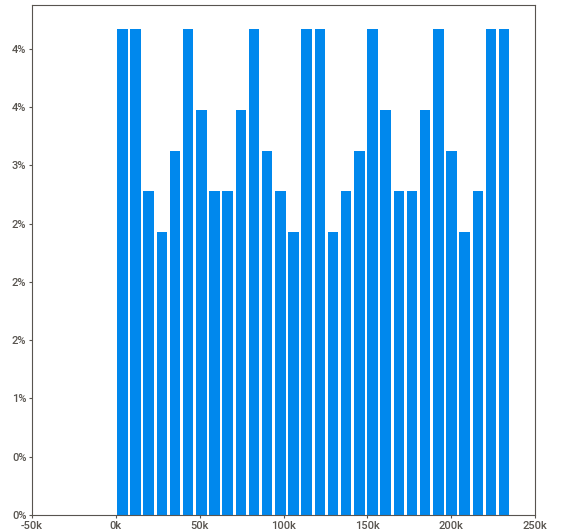
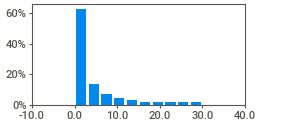
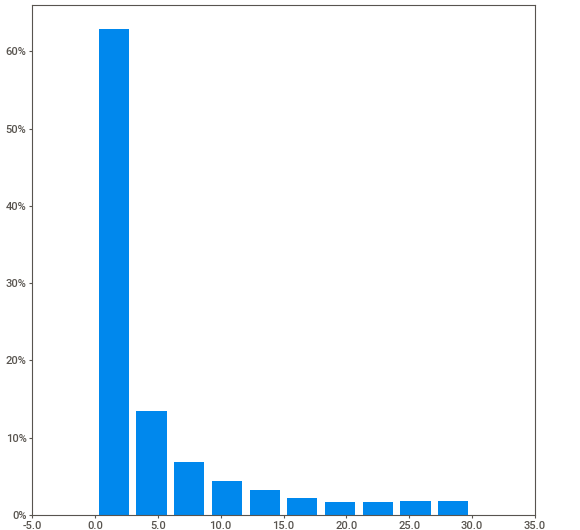
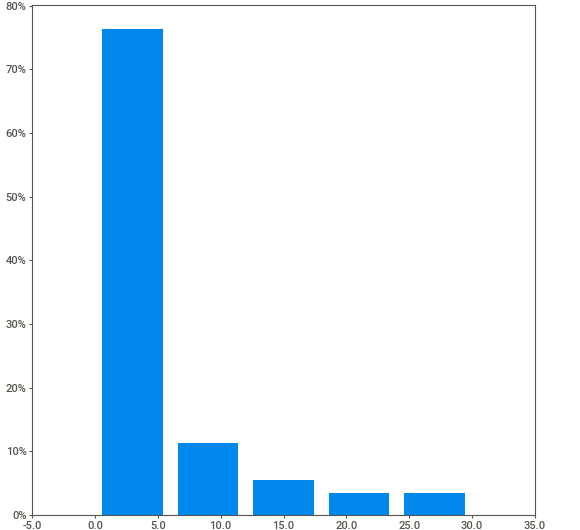
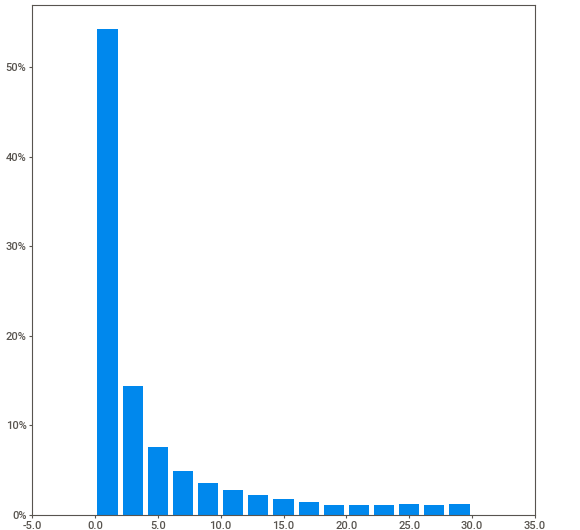
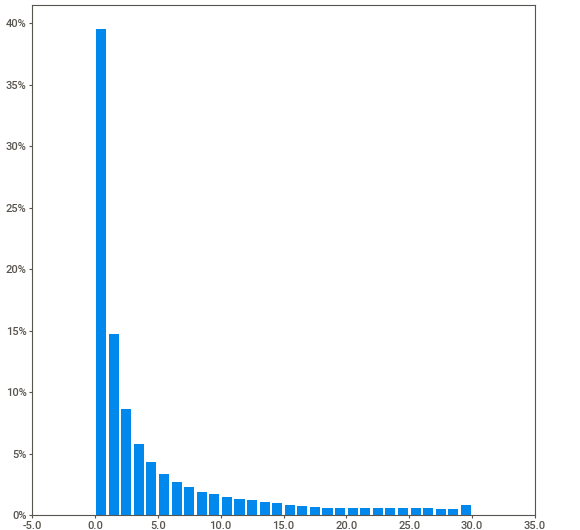
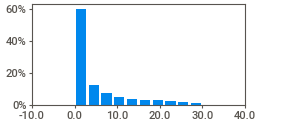
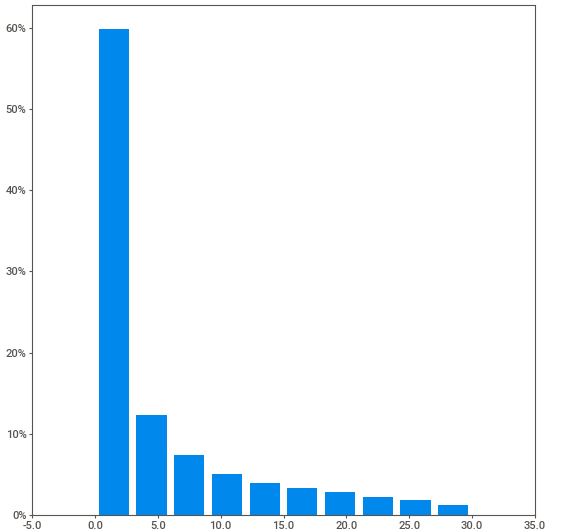
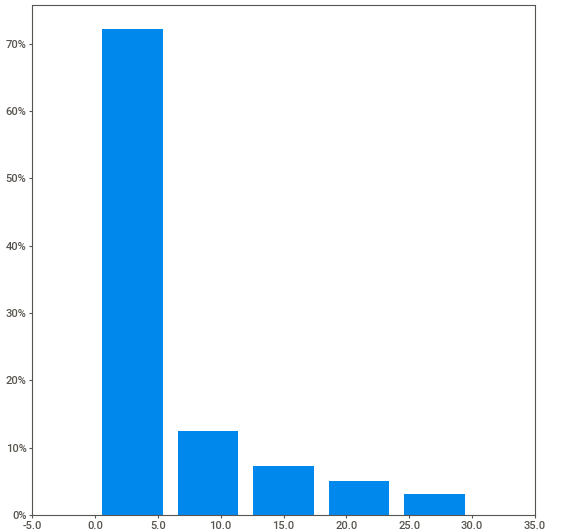
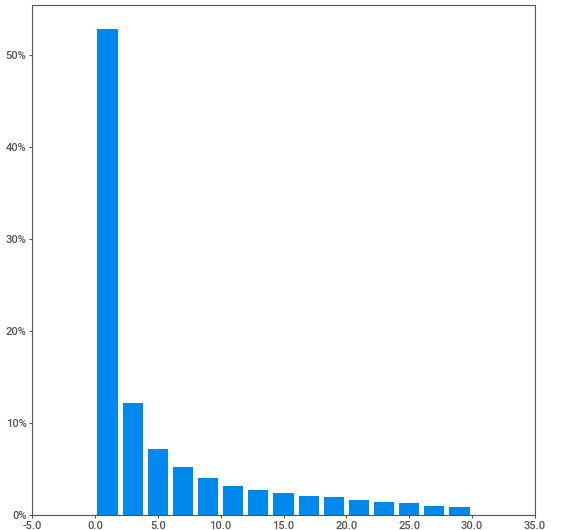
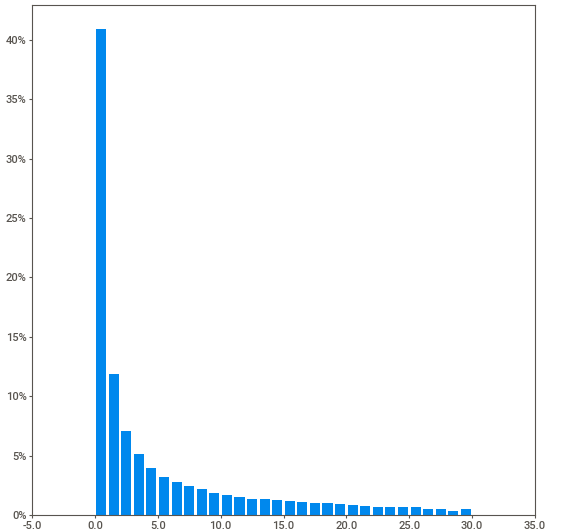
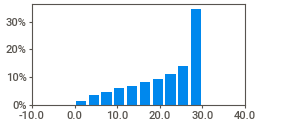
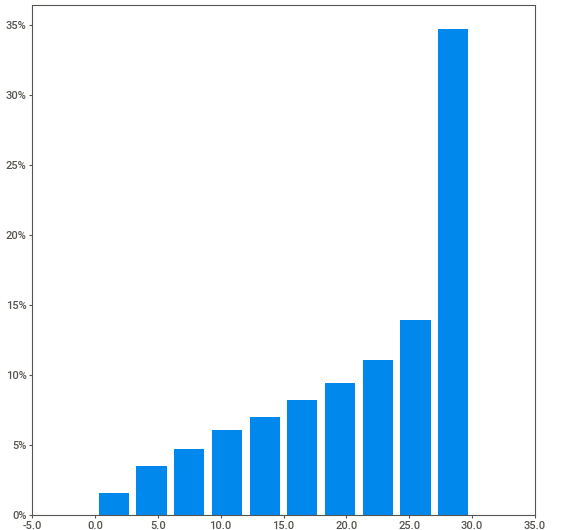
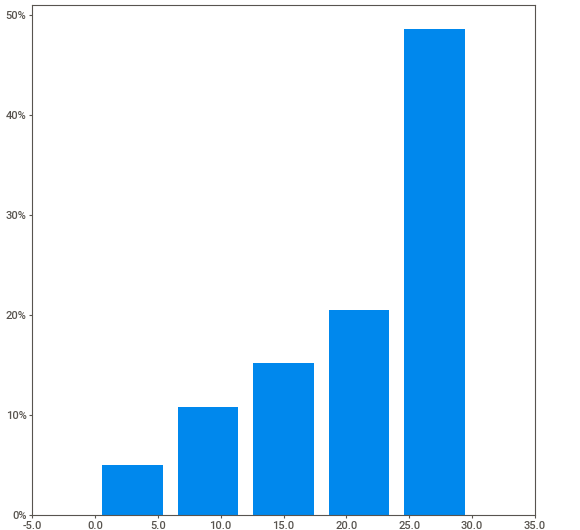
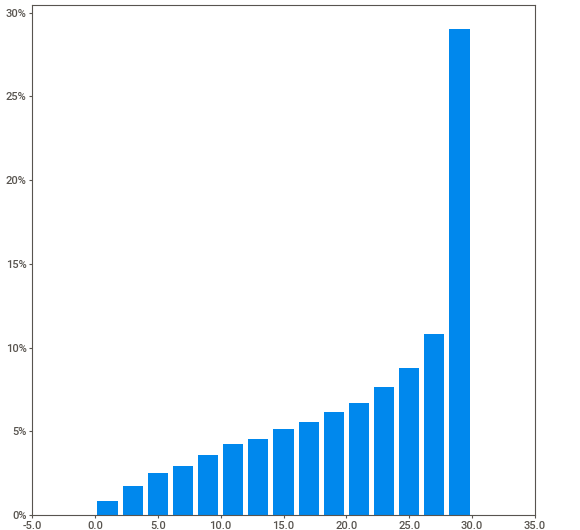
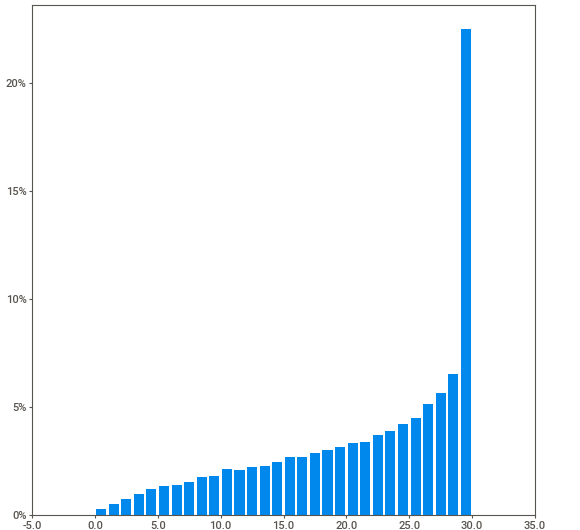
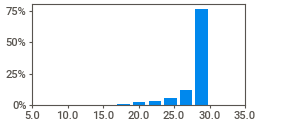
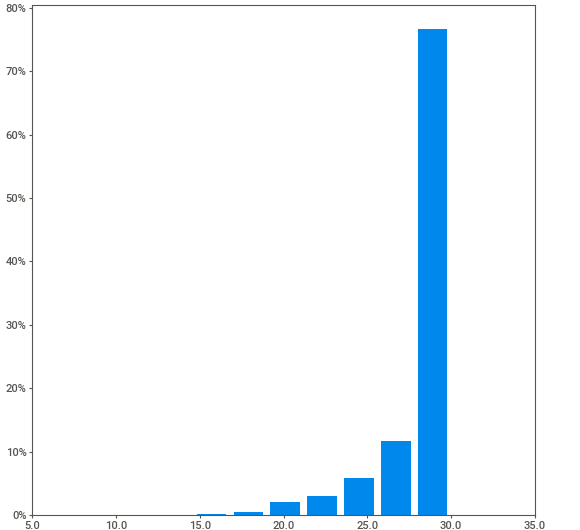
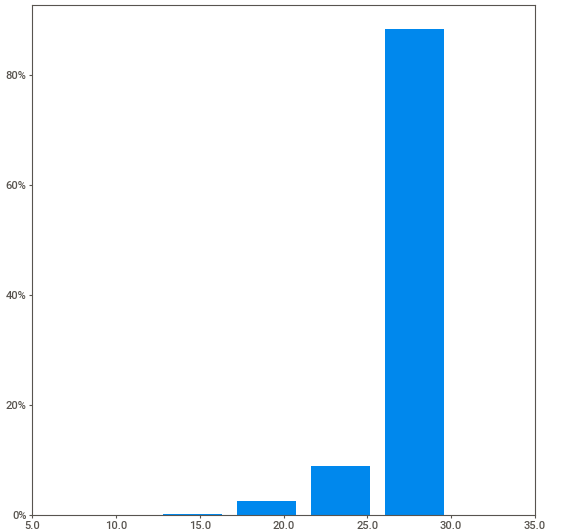
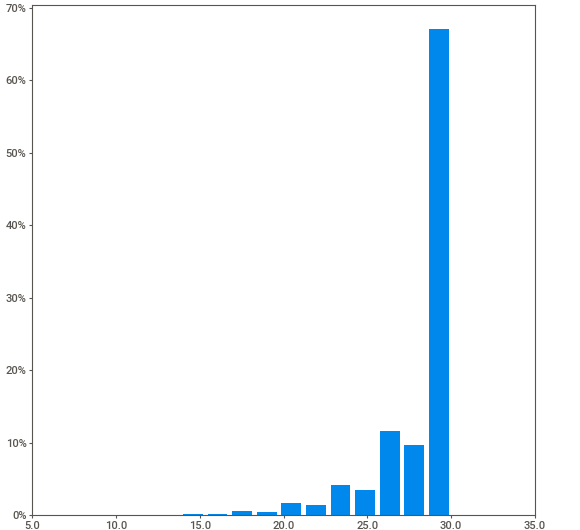
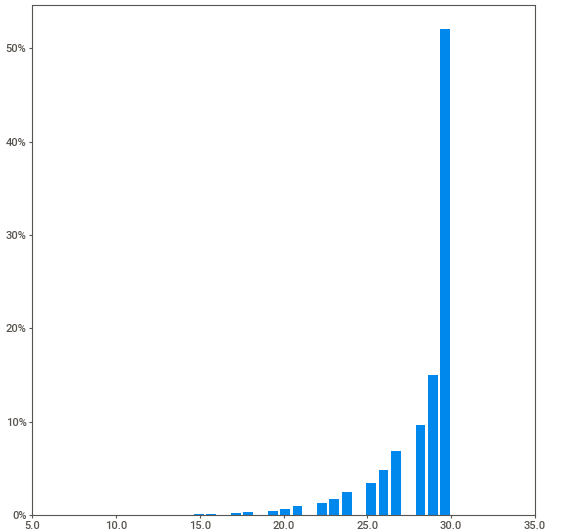
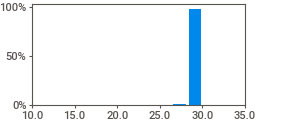
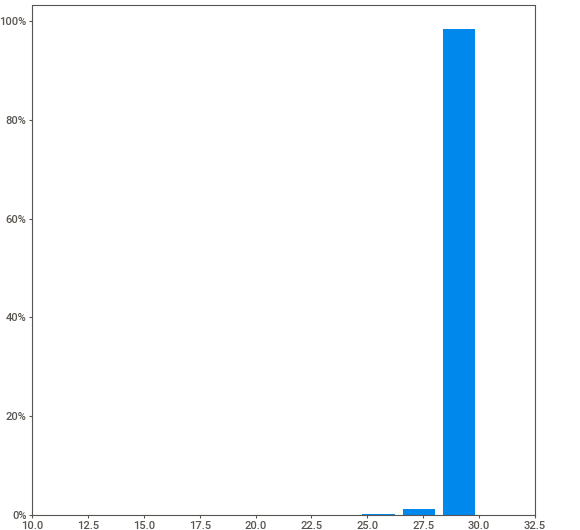
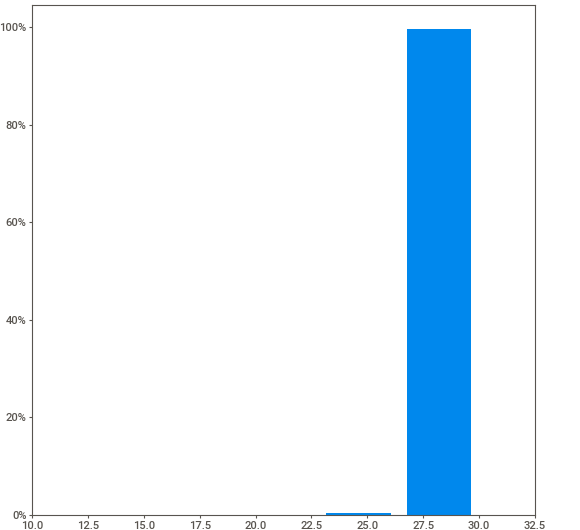
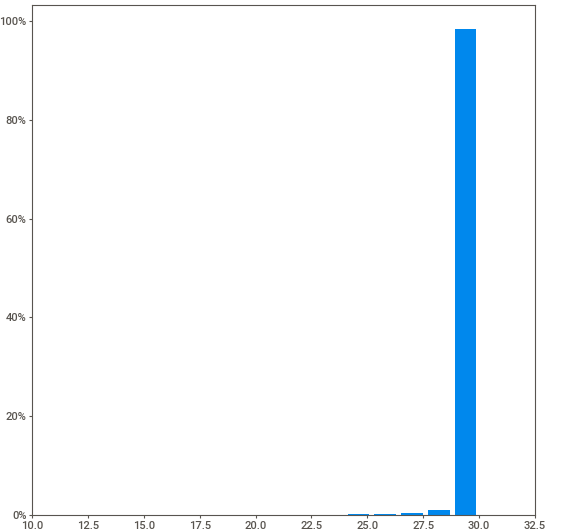
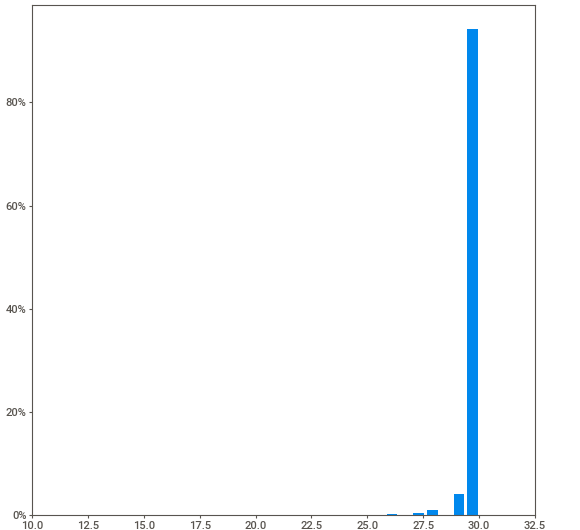
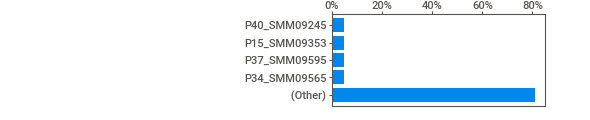
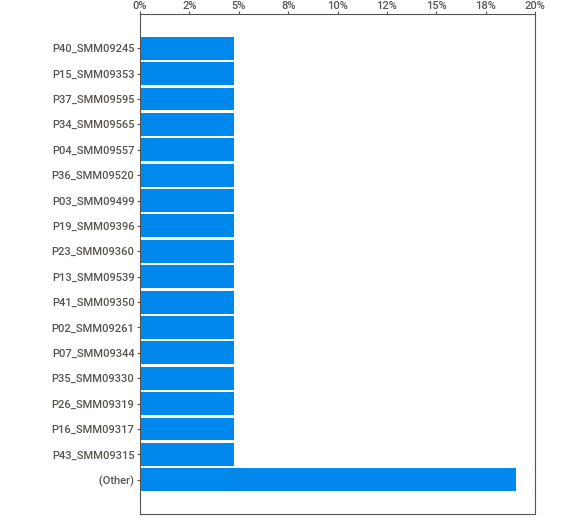
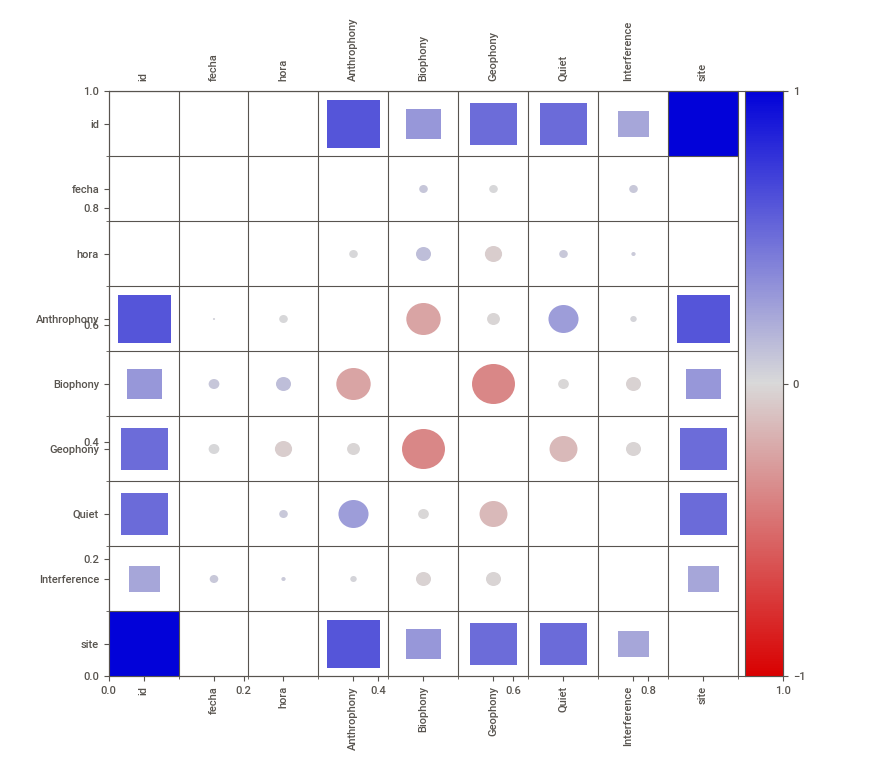
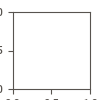

In [2]:
import sweetviz as sv

# Data profiler de sweetviz
report1 = sv.analyze([indices, "Índices"])  # Indicar el DataFrame a analizar
report2 = sv.analyze([riquezas, "Riquezas"])
report3 = sv.analyze([biofonias, "Biofonías"])

# Generar reporte
report1.show_notebook() # Muestra el reporte en el notebook
report2.show_notebook()
report3.show_notebook()

# Opcional: Guardar el reporte en un archivo HTML
#report1.show_html('indices_report.html') # Guarda el reporte en un archivo HTML
#report2.show_html('riquezas_report.html')
#report3.show_html('biofonias_report.html')

#### Informe de Análisis Exploratorio de Datos (EDA)

**Índices:**
Este Df contiene 19 columnas y 96.768 registros.
Las columnas de la 1 a la 6 contienen metadatos referentes cada registro tales como:
- datetime
- id (del grabador) 
- fecha
- hora
- site (donde se realizó la grabación)
- file (ruta archivo origen)

Las columnas de la 7 a la 19 contienen valores para 13 disitntos índices acústicos.
Ninguna de las variables presenta valores perdidos. 

**Riquezas:**
Este Df contiene 3 columnas y 96.768 registros.
Las columnas son:
- datetime
- site (donde se realizó la grabación)
- unique_species_count (numero de especies disitintas detectadas)

No se encontaron valores perdidos en ninguna de las varibles


**Biofonías:**
Este Df contiene 10 columnas y 96.768 registros.
Las columnas son las siguientes:
- id (del grabador)
- fecha 
- hora
- Anthrophony
- Biophony
- Geophony
- Quiet
- Interference
- datetime
- site (dode se realizó la grabación)



In [24]:
# Normalizar los valores de 'site' en todos los DataFrames para que tengan el mismo formato
indices['site'] = indices['site'].str.replace('-', '_')
riquezas['site'] = riquezas['site'].str.replace('-', '_')
biofonias['site'] = biofonias['site'].str.replace('-', '_')

# Asegúrate de que ambas columnas sean del mismo tipo
indices['datetime'] = pd.to_datetime(indices['datetime'])
riquezas['datetime'] = pd.to_datetime(riquezas['datetime'])
biofonias['datetime'] = pd.to_datetime(biofonias['datetime'])

# Merge de los DataFrames basado en 'datetime' y 'site'
merged_df = pd.merge(indices, riquezas, on=['datetime', 'site'])
merged_df = pd.merge(merged_df, biofonias, on=['datetime', 'site'])

# Visualización del DataFrame combinado
print(merged_df.head())

    datetime      id_x   fecha_x   hora_x          site  \
0 2023-09-28  SMM09353  20230928  0:00:00  P15_SMM09353   
1 2023-09-28  SMM09520  20230928  0:00:00  P36_SMM09520   
2 2023-09-28  SMM09557  20230928  0:00:00  P04_SMM09557   
3 2023-09-28  SMM09245  20230928  0:00:00  P40_SMM09245   
4 2023-09-28  SMM09565  20230928  0:00:00  P34_SMM09565   

                                                file         MEANt  \
0  /home/msg/Escritorio/Camilo_Behrens/20230928/P...  1.890000e-19   
1  /home/msg/Escritorio/Camilo_Behrens/20230928/P...  5.140000e-20   
2  /home/msg/Escritorio/Camilo_Behrens/20230928/P...  3.980000e-20   
3  /home/msg/Escritorio/Camilo_Behrens/20230928/P... -3.760000e-20   
4  /home/msg/Escritorio/Camilo_Behrens/20230928/P... -4.250000e-19   

           VARt        Ht     MEANf  ...          BI  unique_species_count  \
0  4.440000e-06  0.990822  0.000056  ...   28.838343                     0   
1  2.980000e-05  0.957052  0.000189  ...  156.819991                

**Unión de Dataframes**

<div style="text-align: justify;">
Se procede a unir los 3 dataframes en unos solo basado en datetime y site, dado que estos dos forman una clave primaria para cada registro. Primero se verificó que sitios tuvieran el mismo formato y que las columnas datetime tuviesen este formato.  
Finalmente se utilizó la funcion .merge de pandas indicando los df a unir y con el argumento 'on' para indicar las columnas clave en las que se basa la combinación.
</div>

In [25]:
# Eliminar columnas duplicadas o innecesarias

merged_df = merged_df.drop(columns=['file', 'id_y', 'fecha_y', 'hora_y', 'Anthrophony', 'Geophony', 'Quiet', 'Interference'])

print(merged_df.head())



    datetime      id_x   fecha_x   hora_x          site         MEANt  \
0 2023-09-28  SMM09353  20230928  0:00:00  P15_SMM09353  1.890000e-19   
1 2023-09-28  SMM09520  20230928  0:00:00  P36_SMM09520  5.140000e-20   
2 2023-09-28  SMM09557  20230928  0:00:00  P04_SMM09557  3.980000e-20   
3 2023-09-28  SMM09245  20230928  0:00:00  P40_SMM09245 -3.760000e-20   
4 2023-09-28  SMM09565  20230928  0:00:00  P34_SMM09565 -4.250000e-19   

           VARt        Ht     MEANf          VARf        Hf     SKEWf  \
0  4.440000e-06  0.990822  0.000056  5.520000e-09  0.713048  2.979317   
1  2.980000e-05  0.957052  0.000189  2.210000e-08  0.883924  0.787159   
2  8.940000e-07  0.984667  0.000037  3.600000e-10  0.918459  2.145733   
3  9.980000e-05  0.709976  0.000298  9.680000e-08  0.795403  2.198737   
4  1.081640e-04  0.950643  0.000333  1.020000e-07  0.812370  2.247418   

       KURTf         ACI      NDSI       ADI       AEI          BI  \
0  11.379908  297.205218 -0.786162  2.078736  0.0205

In [26]:
# Renombrar columnas
merged_df = merged_df.rename(columns={
    'id_x': 'id',
    'fecha_x': 'fecha',
    'hora_x': 'hora',
    'site': 'sitio',
    'unique_species_count': 'especies',
    'Biophony': 'biofonia'
})

# Visualización del DataFrame con los nuevos nombres de columnas
print(merged_df.head())

    datetime        id     fecha     hora         sitio         MEANt  \
0 2023-09-28  SMM09353  20230928  0:00:00  P15_SMM09353  1.890000e-19   
1 2023-09-28  SMM09520  20230928  0:00:00  P36_SMM09520  5.140000e-20   
2 2023-09-28  SMM09557  20230928  0:00:00  P04_SMM09557  3.980000e-20   
3 2023-09-28  SMM09245  20230928  0:00:00  P40_SMM09245 -3.760000e-20   
4 2023-09-28  SMM09565  20230928  0:00:00  P34_SMM09565 -4.250000e-19   

           VARt        Ht     MEANf          VARf        Hf     SKEWf  \
0  4.440000e-06  0.990822  0.000056  5.520000e-09  0.713048  2.979317   
1  2.980000e-05  0.957052  0.000189  2.210000e-08  0.883924  0.787159   
2  8.940000e-07  0.984667  0.000037  3.600000e-10  0.918459  2.145733   
3  9.980000e-05  0.709976  0.000298  9.680000e-08  0.795403  2.198737   
4  1.081640e-04  0.950643  0.000333  1.020000e-07  0.812370  2.247418   

       KURTf         ACI      NDSI       ADI       AEI          BI  especies  \
0  11.379908  297.205218 -0.786162  2.0787

**Limpieza**

<div style="text-align: justify;">
En las dos celdas anteriores se eliminaron columnas duplicadas y aquellas que no se utilizarán, y se modificó el nombre de algunas columnas para mayor claridad y homegeneidad en idioma y forma.
</div>

In [17]:
merged_df.dtypes

datetime    datetime64[ns]
id                  object
fecha                int64
hora                object
sitio               object
MEANt              float64
VARt               float64
Ht                 float64
MEANf              float64
VARf               float64
Hf                 float64
SKEWf              float64
KURTf              float64
ACI                float64
NDSI               float64
ADI                float64
AEI                float64
BI                 float64
especies             int64
biofonia             int64
dtype: object

**Verificación formatos**

<div style="text-align: justify;">
Se verificaron los formatos de cada columna y se rectificaron en caso de ser necesario.
Datetime ya había sido formateado como datetime para realizar el merge.
</div>

## Visualizaciones

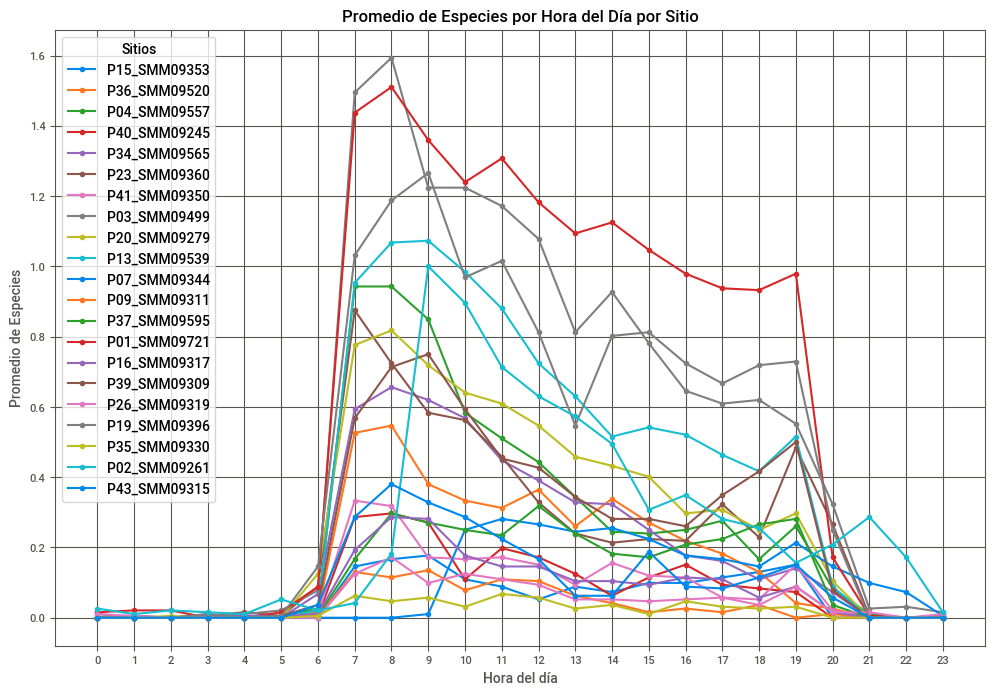

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Verificar si 'datetime' es datetime si no está ya convertido
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Crear una nueva columna 'hora' que solo contenga la hora
merged_df['hora'] = merged_df['datetime'].dt.hour

# Graficar los valores para cada sitio
sitios = merged_df['sitio'].unique()

plt.figure(figsize=(12, 8))

for sitio in sitios:
    # Filtrar por sitio
    sitio_df = merged_df[merged_df['sitio'] == sitio]
    
    # Calcular el promedio de 'especies' para cada hora
    prom_diario = sitio_df.groupby('hora')['especies'].mean().reset_index()
    
    # Graficar los valores
    plt.plot(prom_diario['hora'], prom_diario['especies'], marker='o', linestyle='-', label=f'{sitio}')

# Configuración del gráfico
plt.xlabel('Hora del día')
plt.ylabel('Promedio de Especies')
plt.title('Promedio de Especies por Hora del Día por Sitio')
plt.grid(True)
plt.xticks(range(0, 24))  # Asegurarse de que todas las horas estén en el eje x
plt.legend(title='Sitios')
plt.show()


**Figura 1**

<div style="text-align: justify;">
En esta figura se graficaron el promedio de especies por hora durante los 15 días de grabación para cada sitio de muestreo.
Se evidencia que independiente de la magnitud del cambio, en todos los sitio existe un aumento del número promedio de especies a partir de las 6 horas. Tambien se puede apreciar que el número de especies se tiende a disminuir a lo largo del día. Y por último, entorno a las 20 horas el número de especies tiende a cero en practicamente todos los sitios.
</div>

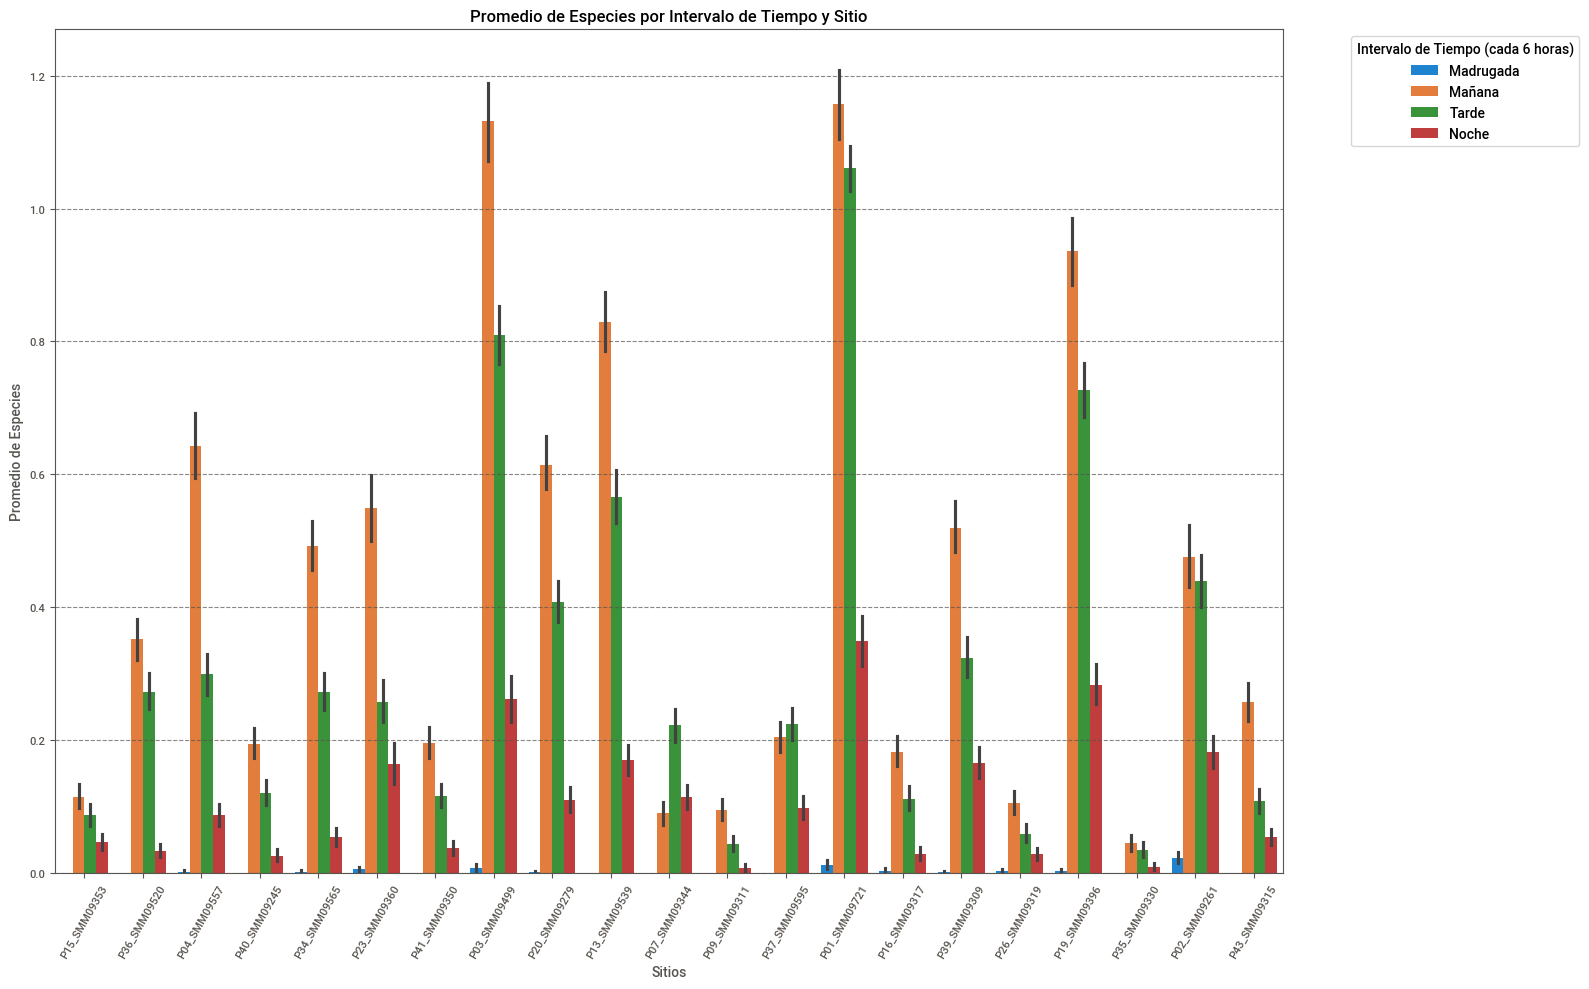

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir 'datetime' a datetime si no está ya convertido
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Crear una nueva columna '6h_intervalo' que agrupe por intervalos de 6 horas
merged_df['6h_interval'] = (merged_df['datetime'].dt.hour // 6) * 6  # Agrupar horas en 0-5, 6-11, etc.

# Mapear los intervalos a etiquetas legibles
interval_labels = {0: 'Madrugada', 6: 'Mañana', 12: 'Tarde', 18: 'Noche'}
merged_df['6h_interval_label'] = merged_df['6h_interval'].map(interval_labels)

# Configurar el tamaño del gráfico
plt.figure(figsize=(16, 10))

# Crear el gráfico de barras agrupado por sitio e intervalo de tiempo
sns.barplot(data=merged_df, x='sitio', y='especies', hue='6h_interval_label')

# Configuración del gráfico
plt.xlabel('Sitios')
plt.ylabel('Promedio de Especies')
plt.title('Promedio de Especies por Intervalo de Tiempo y Sitio')
plt.xticks(rotation=60)
plt.legend(title='Intervalo de Tiempo (cada 6 horas)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Figura 2**

<div style="text-align: justify;">
En esta figura se grafica la distribución del número de especies agrupados en rangos de cada 6 horas para cada sitio.
Se puede apreciar que en 15 de 21 sitios la mayor cantidad de especies se encuentran durante la mañana (naraja) y la tarde (verde). Mientras que durante la madrugada (azul) practicamente no se encuentran especies. 
</div>

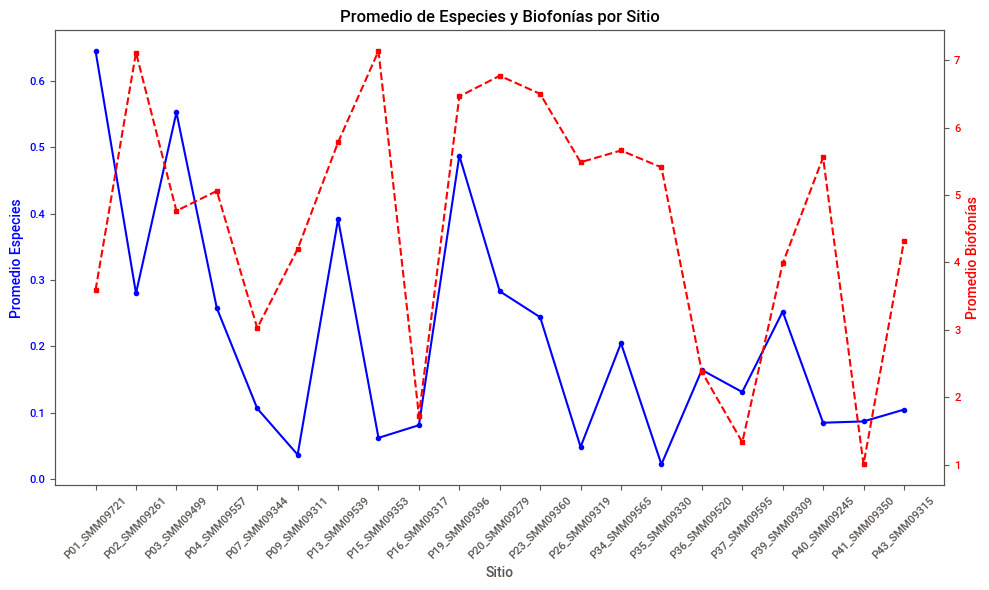

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = merged_df

# Calcular promedios por sitio
promedios = df.groupby('sitio').agg({'especies': 'mean', 'biofonia': 'mean'}).reset_index()

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de líneas para especies
ax1.plot(promedios['sitio'], promedios['especies'], color='b', marker='o', label='Promedio Especies')
ax1.set_xlabel('Sitio')
ax1.set_ylabel('Promedio Especies', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y para biofonias
ax2 = ax1.twinx()
ax2.plot(promedios['sitio'], promedios['biofonia'], color='r', marker='s', linestyle='--', label='Promedio Biofonías')
ax2.set_ylabel('Promedio Biofonías', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Modificar las etiquetas del eje X para que estén en perpendicular
ax1.set_xticks(range(len(promedios['sitio'])))
ax1.set_xticklabels(promedios['sitio'], rotation=45)

# Agregar título y ajustar layout
plt.title('Promedio de Especies y Biofonías por Sitio')
fig.tight_layout()  # Ajustar el layout para evitar superposiciones

# Mostrar el gráfico
plt.show()



**Figura 3**

<div style="text-align: justify;">
En esta figura se grafica el promedio total (durante los 15 días) tanto para especies (linea continua azul) como para Biofonías (linea punteada roja). 
Se puede apreciar que existen sitio en los cuales hay una concordancia entre ambas variables (e.g. P13, P16, P19), mientras que hay otros sitios en los cuales se aprecia un desacople entre ambas variables (e.g. P01, P02, P40)
</div>